https://medium.com/geekculture/applying-7-classification-algorithms-on-the-titanic-dataset-278ef222b53c#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjE3MjdiNmI0OTQwMmI5Y2Y5NWJlNGU4ZmQzOGFhN2U3YzExNjQ0YjEiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NjA2OTkzMzEsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNDU3OTc4MDkzMjIwMjM4ODUxNyIsImVtYWlsIjoianVuZzY2NjU5N0BnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IuygleywrCIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BSXRidm1sSTZSYUNLa0JhNE90cjlXdFd4cmZIajBNRWx1TVBLTjFSdlVSYz1zOTYtYyIsImdpdmVuX25hbWUiOiLsoJXssKwiLCJpYXQiOjE2NjA2OTk2MzEsImV4cCI6MTY2MDcwMzIzMSwianRpIjoiZTYzMGJlMWE2ODBjYjZmMmRlYjY3ZmNlZGY1ZTg1ZmM0YWY0NmZhMiJ9.gDgQiMDvr_mFykypEOV2TBwMKvI72P5QrWqmDz7HgkISRzi_ditfpuraZuUMd3-t2V1QtKpJ7pD16zQ44RPdiwXZ6v2yGegLqYYfYbdnf-KdacqbNoB_Ize2H0aHxT6CxzE99RgfSVOzKozzp3MfZAhESGCbZnM34cUQybuSXAmADVJ9WgDXqc_UX8FcoQcvOaqP8A3fIKiadqBxWTIwmqpp5IrybcwssM3A7b6EctOqZrZFiLGXk_Pk0htRqS3-_Yw1Q-AjzGmRdSjnt5palCC8kfLIm7gb2tckunts-BLABw40aLiXli2gSlFRi6bSZZogeP-62atqu0dUgv7oJw
https://eshitagoel.medium.com/eda-on-titanic-machine-learning-from-disaster-6b518bb97e17

- 이상치 제거
- train-test split
- 데이터 핸들링
- one-hot 인코딩
- 간단한 

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('../data/titanic/train.csv')
train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [572]:
test = pd.read_csv('../data/titanic/test.csv')
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## 0. Data 확인

In [573]:
# dtype 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- object형 피처: Name, Sex, Ticket, Cabin, Embarked
- float형 피처: Age
- int형 피처: 나머지

In [574]:
# null 값 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

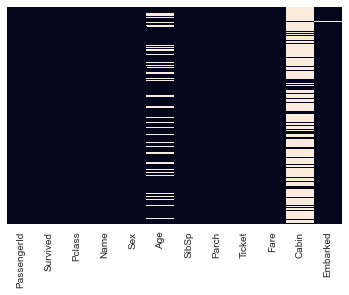

In [575]:
import seaborn as sns

sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

- Age, Embarked는 null값 대체
- Cabin은 null값이 대부분이기 때문에 삭제.
    - 하지만 선박 침몰은 한쪽 방향으로 이루어지고, 배의 상단에 위치할 수록 생존 가능성이 높아지므로 데이터만 허락한다면 좋은 지표가 될 수 있을 것으로 예상. 따라서 분석과는 별개로 전처리를 해 볼 예정.

In [576]:
# 수치형 데이터 주요 지표 확인
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

- AGE는 ms, mrs 등 Prefix을 통해 여성의 연령대를 추정하기 쉬우므로 Prefix라는 컬럼을 새로 만들고, 평균, 중앙값을 통해 결측치를 대체하겠음.

In [577]:
combined_data = [train,test]

for data in combined_data:
    data["Prefix"] = data["Name"].str.extract(' ([A-Za-z]+)\.', expand = False)

In [578]:
Prefix_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":0,"Dr":3,"Rev":3,
                  "Major":3,"Mlle":1,"Col":3,"Capt":0,"Sir":0,"Ms":1,
                  "Lady":1,"Mme":3,"Countess":3,"Jonkheer":3,"Don":3}
for data in combined_data:
    data["Prefix"] = data["Prefix"].map(Prefix_mapping)

## 1. EDA

### 1.1. 이산형 변수 EDA

> **1.1.1. Pclass & Survived**

In [579]:
# Pclass등급과 생존률survive의 관계
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Text(0.5, 1.0, 'Pclass-Survived')

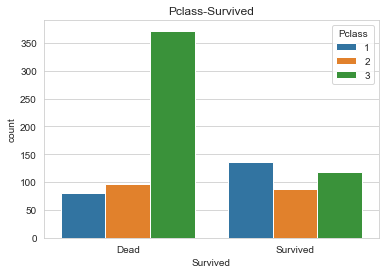

In [580]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Pclass", data = train)
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Pclass-Survived')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


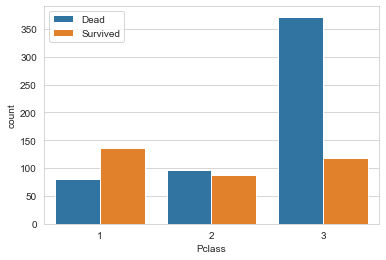

In [581]:
ax = sns.countplot("Pclass", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper left')

- Pclass가 낮을 수록 사망률이 높았다.


> **1.1.2. Sex & Survived**

In [582]:
# Sex와 생존률survive의 관계
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

Text(0.5, 1.0, 'Pclass-Survived')

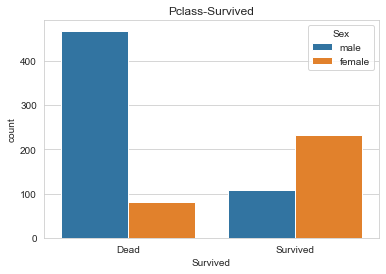

In [583]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Sex", data = train)
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Pclass-Survived')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


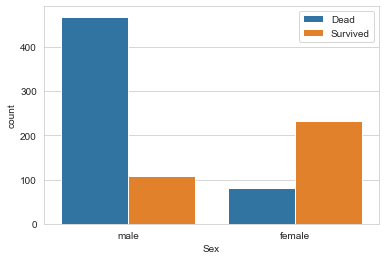

In [584]:
ax = sns.countplot("Sex", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


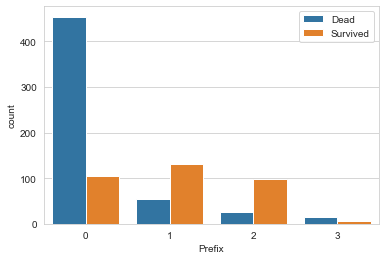

In [585]:
ax = sns.countplot("Prefix", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')

- 0(Mr): 남성은 생존자보다 사망자가 많다.
- 1(Mrs), 2(Miss): 여성은 사망자보다 생존자가 더 많다. 비율상 기혼자의 생존률이 높아 보인다.
- 3(나머지): 미미하지만 사망자가 더 많다.

- 여성이 남성보다 생존률이 높다.

> **1.1.3. SibSp & Survived**

In [586]:
# SibSp과 생존률survive의 관계
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

Text(0.5, 1.0, 'SibSp-Survived')

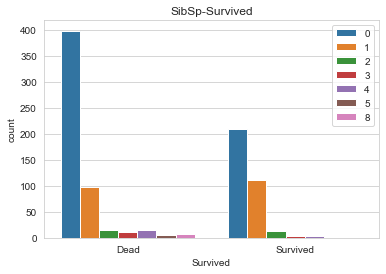

In [587]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "SibSp", data = train)
plt.legend(loc = 'upper right')
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('SibSp-Survived')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


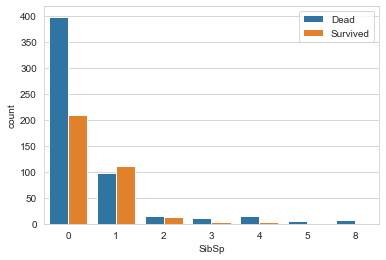

In [588]:
ax = sns.countplot("SibSp", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')

- 배우자나 형제-자매가 1명 혹은 2명인 경우의 생존률이 비교적 높았다.


> **1.1.4. Parch & Survived**

In [589]:
# Parch와 생존률survive의 관계
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

Text(0.5, 1.0, 'Parch-Survived')

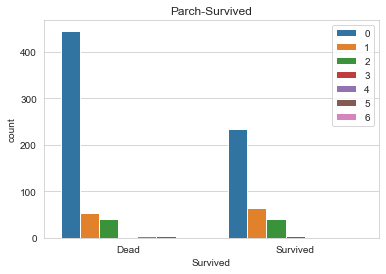

In [590]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Parch", data = train)
plt.legend(loc = 'upper right')
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Parch-Survived')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


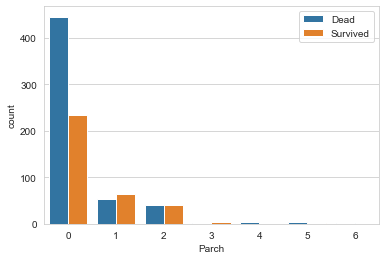

In [591]:
ax = sns.countplot("Parch", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')

- 혼자인 경우가 많아 사망자와 생존자 모두 많았다.
- 부모 혹은 자식이 3명인 경우의 생존률이 가장 높았고, 1명 혹은 2명인 경우 절반 이상 생존했다.

> **1.1.5. Family & Survived**

In [592]:
# 가족 수를 합쳐 새로운 칼럼 Family 생성.
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']
train['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [593]:
# Family와 생존률survive의 관계
train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Family  Survived
3       3  0.724138
2       2  0.578431
1       1  0.552795
6       6  0.333333
0       0  0.303538
4       4  0.200000
5       5  0.136364
7       7  0.000000
8      10  0.000000

Text(0.5, 1.0, 'Family-Survived')

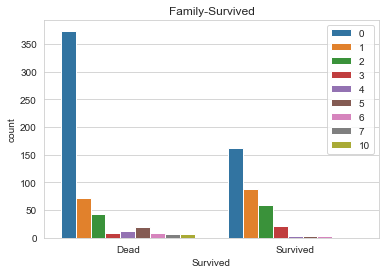

In [594]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Family", data = train)
plt.legend(loc = 'upper right')
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Family-Survived')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


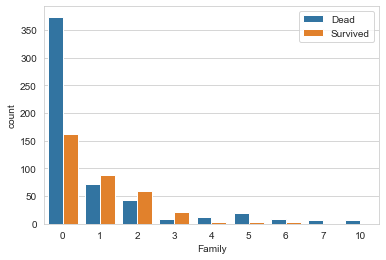

In [595]:
ax = sns.countplot("Family", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')

- 가족이 1~3명인 경우 사망자보다 생존자가 더 많았다
- 가족 없이 혼자 탑승한 경우 탑승자가 워낙 많기 때문에 사망자와 생존자 모두 많았다.

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda3\envs\python3

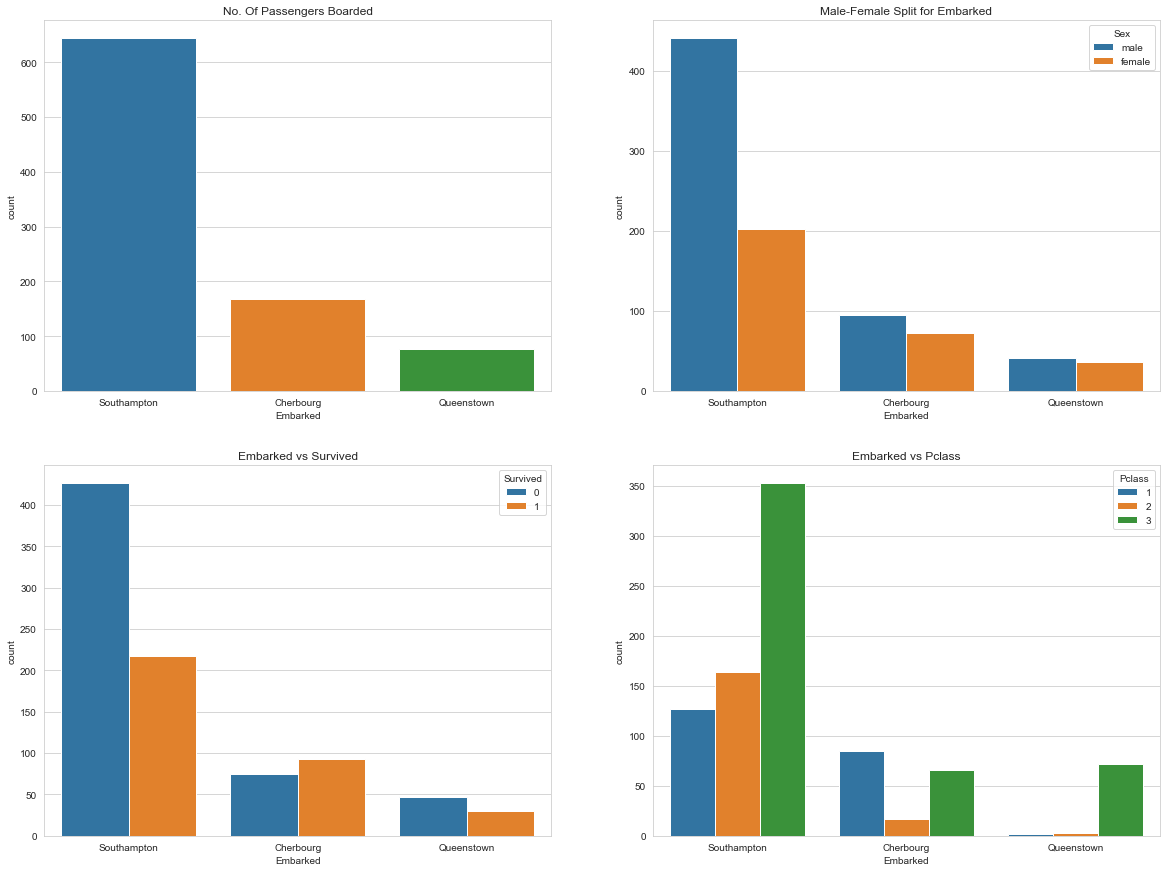

In [596]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=train,ax=ax[0,0])

ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,0].set_xticklabels(["Southampton","Cherbourg","Queenstown"])

ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[0,1].set_xticklabels(["Southampton","Cherbourg","Queenstown"])

ax[1,0].set_title('Embarked vs Survived')
ax[1,0].set_xticklabels(["Southampton","Cherbourg","Queenstown"])
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])

ax[1,1].set_title('Embarked vs Pclass')
ax[1,1].set_xticklabels(["Southampton","Cherbourg","Queenstown"])
plt.show()

- 절반 이상의 승객이 ‘Southampton’에서 탑승하고, 승객의 70%가 남성
- Cherbourg에서 탑승한 승객들은 1등 객실 승객의 비중, 생존률이 높음 -> 

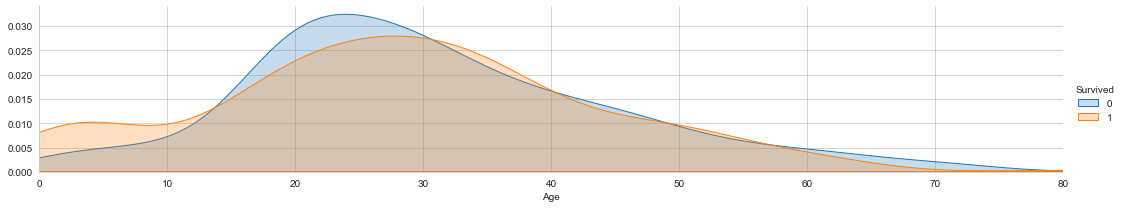

In [597]:
fac = sns.FacetGrid(train, hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()

In [598]:
# train["Fare"] = train["Fare"].astype(int)
# test["Fare"] = test["Fare"].astype(int)

In [599]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Prefix       891 non-null    int64  
 13  Family       891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [600]:
# emb_dummies_tr = pd.get_dummies(train["Embarked"])
# train["Q"] = emb_dummies_tr["Q"]
# train["S"] = emb_dummies_tr["S"]
# train.drop(columns="Embarked",inplace = True)

In [601]:
# emb_dummies_ts = pd.get_dummies(test["Embarked"])
# test["Q"] = emb_dummies_ts["Q"]
# test["S"] = emb_dummies_ts["S"]
# test.drop(columns="Embarked",inplace = True)

In [602]:
# train.drop(columns = "PassengerId", inplace = True)
# test.drop(columns = "PassengerId", inplace = True)


In [603]:
train.drop(columns = "Ticket", inplace = True)
test.drop(columns = "Ticket", inplace = True)

In [604]:
# train["Cabin"] = train["Cabin_order"]
# test["Cabin"] = test["Cabin_order"]

# train.drop(columns = "Cabin_order", inplace = True)
# test.drop(columns = "Cabin_order", inplace = True)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

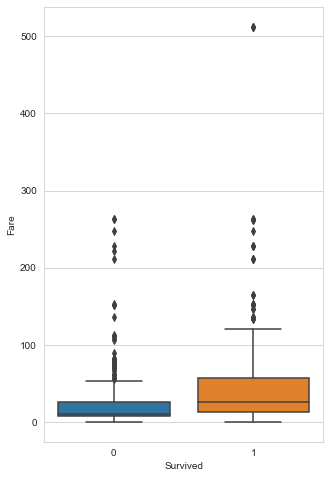

In [605]:
plt.figure(figsize=(5,8))
sns.boxplot(x="Survived",y="Fare",data=train)


c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

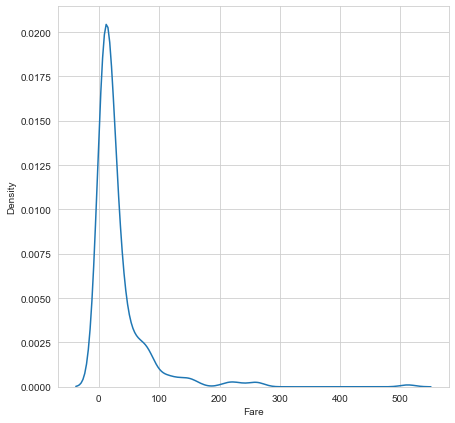

In [606]:
#Fare데이터 분포 확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Fare"],  hist=False)

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

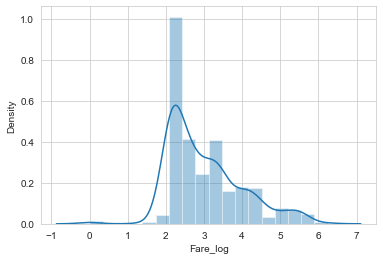

In [607]:
test["Fare_log"] =  np.log(test["Fare"] + 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(test["Fare_log"])

(0.0, 100.0)

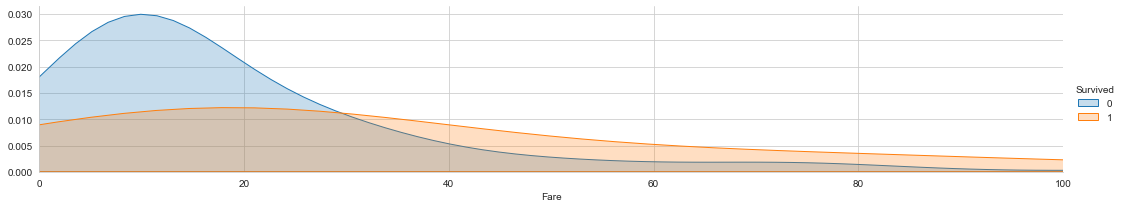

In [608]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Fare',shade=True)
fac.set(xlim=(0,train["Fare"].max()))
fac.add_legend()
plt.xlim(0,100)

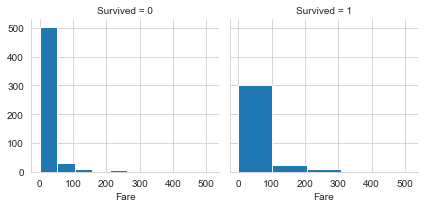

In [609]:
# Fare요금과 Survived의 관계1
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=5)

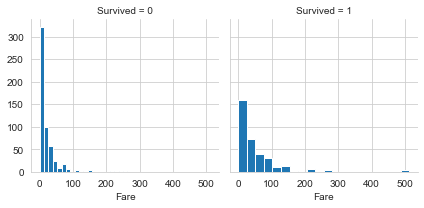

In [610]:
# Fare요금과 Survived의 관계2
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

#### Family: SipSp + Parch

<AxesSubplot:xlabel='Survived', ylabel='count'>

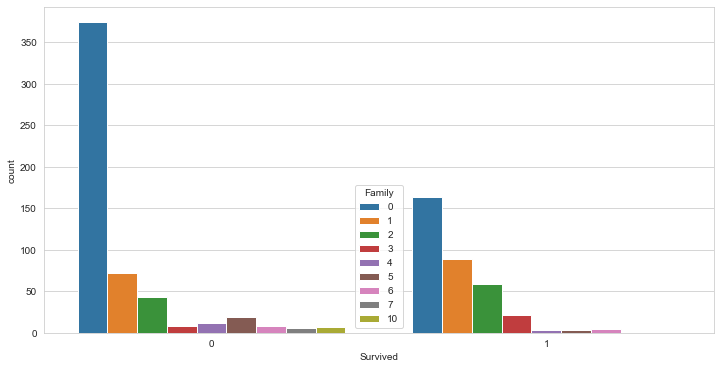

In [611]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Family", data = train)


> **1.1.7. Embarked & Survived**

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


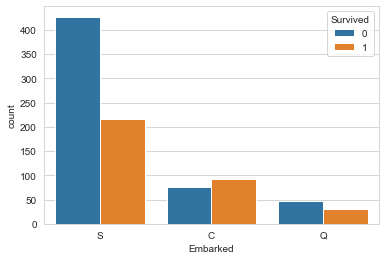

In [612]:
# Embarked승선지와 survived의 관계
ax = sns.countplot("Embarked", hue='Survived', data=train)

- S(Southhampton): 영국의 사우스햄튼에서 탑승한 사람들의 사망률이 높다.
- C(Cherbourg): 프랑스의 셰르부르에서 탐승한 사람은 많지 않으며 생존률이 더 높다.
- Q(Queenstown): 아일랜드의 퀸스타운.

- 타이타닉호는 1912년 4월 14일 사우스햄튼-셸부르-퀸즈타운을 거쳐 미국의 뉴욕으로 향했다.
- 1912년은 1차 세계대전이 발발하기 2년 전으로, 1871년 보불전쟁, 1878년 오스트리아-헝가리 제국의 보스니아 헤르체고비나 점령으로 인한 긴장이 팽팽했던 시기다. 이에 따라 유럽의 많은 사람들이 유럽을 떠나 미국으로 이민갔다.
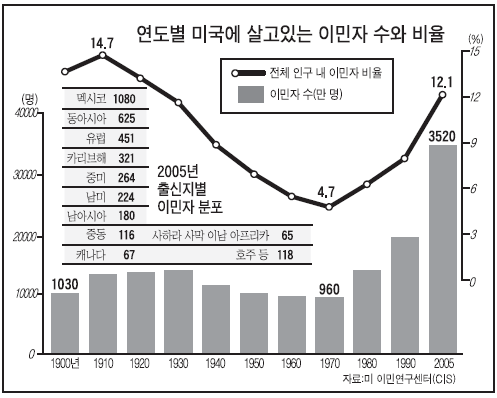
출처: https://news.joins.com/article/1765712?cloc=joongang|marticle|footer
- 항해를 시작할 때 사우스햄튼에서 탑승한 사람들의 사망률이 높았다. 여기에는 선원이 포함되어 있고, 셸부르와 퀸즈타운은 선원이 없을 것으로 추정된다.
- 이 가정이 맞다면 앞서 요금이 0에 가까운 사람들의 사망률이 높은 것도 선원이기 때문으로 추측된다.


c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


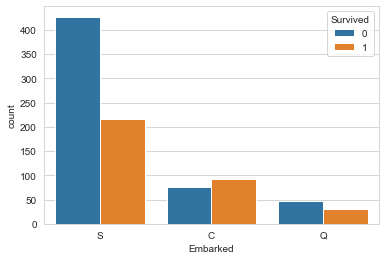

In [613]:
# Embarked승선지와 survived의 관계
ax = sns.countplot("Embarked", hue='Survived', data=train)

- S(Southhampton): 영국의 사우스햄튼에서 탑승한 사람들의 사망률이 높다.
- C(Cherbourg): 프랑스의 셰르부르에서 탐승한 사람은 많지 않으며 생존률이 더 높다.
- Q(Queenstown): 아일랜드의 퀸스타운.

- 타이타닉호는 1912년 4월 14일 사우스햄튼-셸부르-퀸즈타운을 거쳐 미국의 뉴욕으로 향했다.
- 1912년은 1차 세계대전이 발발하기 2년 전으로, 1871년 보불전쟁, 1878년 오스트리아-헝가리 제국의 보스니아 헤르체고비나 점령으로 인한 긴장이 팽팽했던 시기다. 이에 따라 유럽의 많은 사람들이 유럽을 떠나 미국으로 이민갔다.
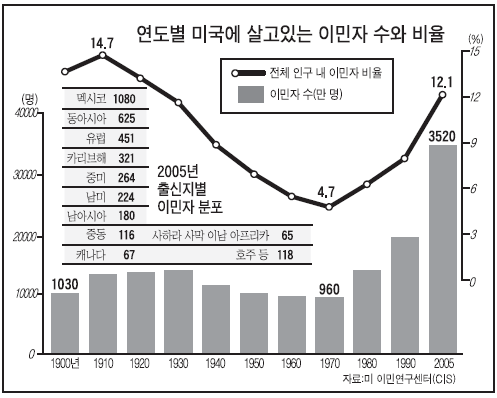
출처: https://news.joins.com/article/1765712?cloc=joongang|marticle|footer
- 항해를 시작할 때 사우스햄튼에서 탑승한 사람들의 사망률이 높았다. 여기에는 선원이 포함되어 있고, 셸부르와 퀸즈타운은 선원이 없을 것으로 추정된다.
- 이 가정이 맞다면 앞서 요금이 0에 가까운 사람들의 사망률이 높은 것도 선원이기 때문으로 추측된다.


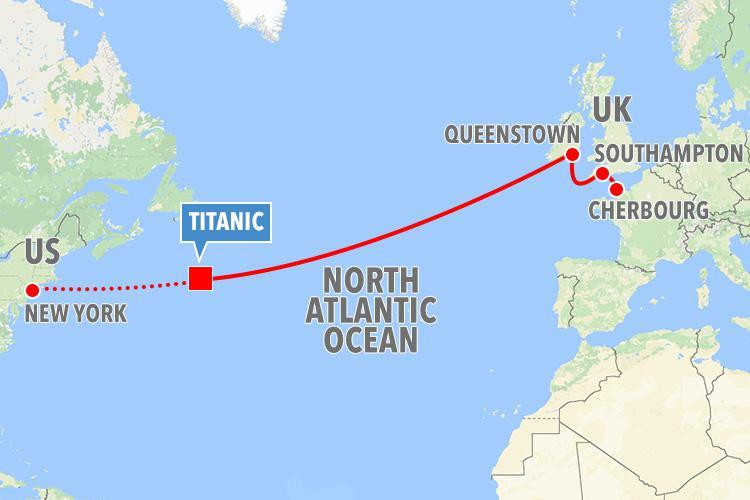
출처: https://www.thesun.ie/news/5091958/titanic-expert-claims-that-ship-was-on-fire-for-days-before-it-hit-iceberg-during-doomed-maiden-voyage/

### 1.2. 연속형 변수와 survived관계


> **1.2.1. Age & Survived**

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

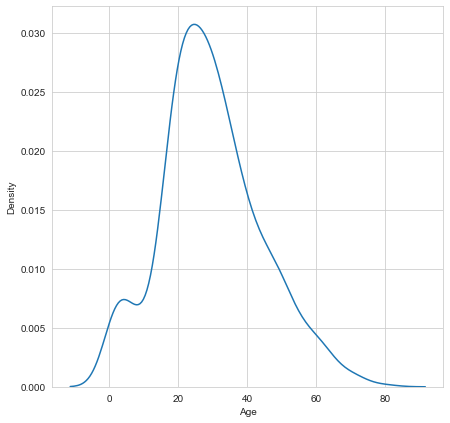

In [614]:
#Age데이터 분포확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Age"],  hist=False)

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_log', ylabel='Density'>

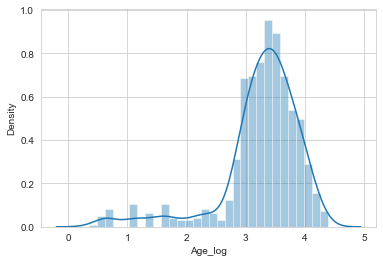

In [615]:
#Age 로그처리-> 정규분포로 바꿔주기
train["Age_log"] =  np.log(train["Age"]+ 1)
test["Age_log"] =  np.log(test["Age"]+ 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Age_log"])

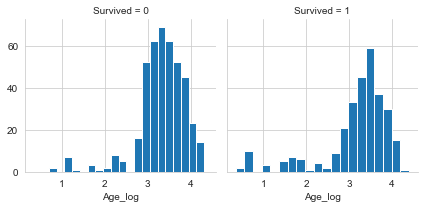

In [616]:
# Age연령과 survived의 관계
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age_log', bins=20)

- 0(notsurvived): 0대, 10대의 생존률이 높다, 20~40대의 생존률이 낮다. 60대 이상의 생존률은 높다.
- 1(survived): 0대의 생존률이 높지만 10대의 생존률은 낮다. 60대 이상의 생존률이 낮다.



> **1.2.2. Fare & Survived**

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

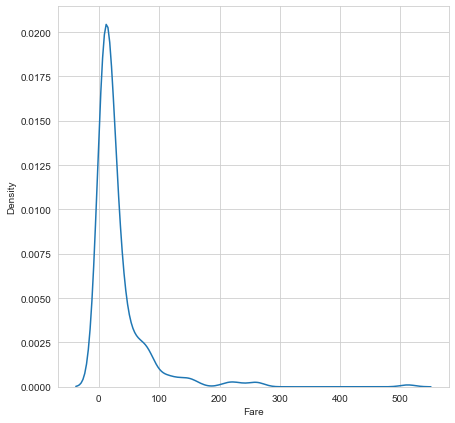

In [617]:
#Fare데이터 분포 확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Fare"],  hist=False)

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

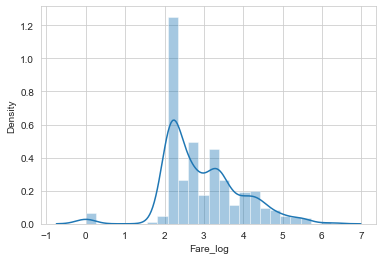

In [618]:
#Fare 로그처리 -> 정규분포로 바꿔주기
train["Fare_log"] =  np.log(train["Fare"] + 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Fare_log"])

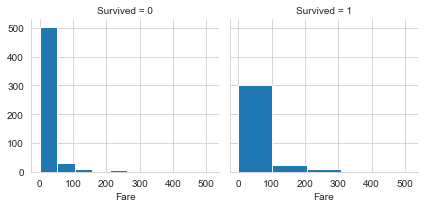

In [619]:
# Fare요금과 Survived의 관계1
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=5)

- 요금Fare이 낮은 경우 사망률이 높지만, 전체적으로 많은 사람들이 낮은 요금을 사용했기 때문에 생존률도 제일 높다.

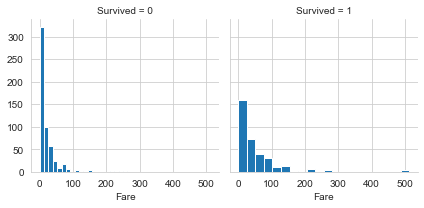

In [620]:
# Fare요금과 Survived의 관계2
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

- 낮은 요금을 낼 수록 사망률이 높지만, 사람이 많은 만큼 생존률도 높은 경향을 보인다.

In [621]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Prefix       891 non-null    int64  
 12  Family       891 non-null    int64  
 13  Age_log      714 non-null    float64
 14  Fare_log     891 non-null    float64
dtypes: float64(4), int64(7), object(4)
memory usage: 104.5+ KB


### 1.3. 두가지 이상의 변수와 생존률Survived의 관계


> **1.3.1. Sex, Pclass & Survived**

In [622]:
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

- 여성: 1, 2 등급 객실의 여성은 각각 96%, 92% 생존했고, 3등급 객실의 여성도 50% 생존
- 남성: 1등급 객실의 남성이 36% 생존하고 2, 3 등급 객실의 남성은 15%이하로 생존

In [623]:
# 10년씩 구분
bins = [10, 20, 30, 40, 50, 60, 70]
train['Age_dgt'] = np.digitize(train['Age'], bins)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Cabin Embarked  Prefix  Family   Age_log  Fare_log  Age_dgt  
0      0   7.2500   NaN        S       0       1  3.135494  2.110213        2  
1      0  71.2833   C85        C       2       1  3.663562  4.280593        3  
2      0   7.9250   NaN        S       1       0  3.295837  2.188856        2  
3      0  53.1000  C123        S       2       1  3.583519  3.990834        3  
4      0   8.0500   NaN        S       0       0  3.583519  2.202765        3


> **1.3.2. Sex, Age_dgt & Survived**

In [624]:
train.pivot_table('Survived', index='Sex', columns='Age_dgt')

Age_dgt         0         1         2         3         4         5         6  \
Sex                                                                             
female   0.633333  0.755556  0.722222  0.833333  0.687500  0.888889  1.000000   
male     0.593750  0.122807  0.168919  0.214953  0.210526  0.133333  0.133333   

Age_dgt         7  
Sex                
female   0.679245  
male     0.129771

- 60대 여성, 50대 여성, 30대 여성, 10대 여성, 40대 여성, 20대 여성, 10세 미만 여성, 10세 미만 남성 순으로 생존률이 높았으며, 10대 이상 남성의 생존률은 21%를 넘지 못했다.


> **1.3.3. Sex, Fare & Survived**

In [625]:
train.pivot_table('Survived', index='Sex', columns='Fare')

Fare    0.0000    4.0125    5.0000    6.2375    6.4375    6.4500    6.4958    \
Sex                                                                            
female       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
male    0.066667       0.0       0.0       0.0       0.0       0.0       0.0   

Fare    6.7500    6.8583    6.9500    ...  153.4625  164.8667  211.3375  \
Sex                                   ...                                 
female       0.0       NaN       NaN  ...       1.0       1.0       1.0   
male         0.0       0.0       0.0  ...       0.0       NaN       NaN   

Fare    211.5000  221.7792  227.5250  247.5208  262.3750  263.0000  512.3292  
Sex                                                                           
female       NaN       NaN       1.0       1.0       1.0       1.0       1.0  
male         0.0       0.0       0.0       0.0       NaN       0.0       1.0  

[2 rows x 248 columns]

In [626]:
# Fare_log로 구분
bins = [1, 2, 3, 4, 5, 6, 7]
train['Fare_dgt'] = np.digitize(train['Fare_log'], bins)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Cabin Embarked  Prefix  Family   Age_log  Fare_log  Age_dgt  \
0      0   7.2500   NaN        S       0       1  3.135494  2.110213        2   
1      0  71.2833   C85        C       2       1  3.663562  4.280593        3   
2      0   7.9250   NaN        S       1       0  3.295837  2.188856        2   
3      0  53.1000  C123        S       2       1  3.583519  3.990834        3   
4      0   8.0500   NaN        S       0       0  3.583519  2.202765        3   

   Fare_dgt  
0         2  
1         4  
2         2  
3         3  
4         2

In [627]:
train.pivot_table('Survived', index='Sex', columns='Fare_dgt')

Fare_dgt         0    1         2         3         4         5    6
Sex                                                                 
female         NaN  NaN  0.654412  0.704082  0.950820  0.888889  1.0
male      0.066667  0.0  0.133144  0.262069  0.392157  0.125000  1.0

- 성별을 불문하고 돈을 많이 낸 사람들은 모두 살아남았다
- 여성의 경우 Fare가 높을 수록 생존률survived가 높은 경향을 보인다.
- 남성의 경우 Fare_log가 4에 해당하는 경우의 생존률이 39%로 다른 경우보다 높았다.


> **1.3.4. Age_dgt, Fare_dgt & Survived**

In [628]:
train.pivot_table('Survived', index='Age_dgt', columns='Fare_dgt')

Fare_dgt    0    1         2         3         4         5    6
Age_dgt                                                        
0         NaN  NaN  0.875000  0.511628  1.000000  0.500000  NaN
1         0.0  NaN  0.328125  0.363636  0.818182  0.750000  NaN
2         1.0  0.0  0.253247  0.545455  0.608696  0.625000  NaN
3         0.0  0.0  0.243902  0.479167  0.925926  0.666667  1.0
4         0.0  NaN  0.200000  0.428571  0.615385  1.000000  NaN
5         NaN  NaN  0.176471  0.466667  0.571429  1.000000  NaN
6         NaN  0.0  0.500000  0.000000  0.800000  0.000000  NaN
7         0.0  NaN  0.256410  0.358974  0.500000  0.000000  NaN


> **1.3.5. Pclass, Fare_dgt & Survived**

In [629]:
train.pivot_table('Survived', index='Pclass', columns='Fare_dgt')

Fare_dgt     0    1         2         3         4         5    6
Pclass                                                          
1         0.00  0.0       NaN  0.500000  0.780220  0.653846  1.0
2         0.00  NaN  0.416667  0.600000  0.285714       NaN  NaN
3         0.25  0.0  0.244275  0.217949  0.357143       NaN  NaN

Age_dgt, Fare_dgt 그리고 Pclass, Fare_dgt와 Survived의 관계를 조사한 결과 뚜렷한 경향성을 파악할 수 없었다.


> **1.3.6. Family_dgt, Age_dgt & Survived**

In [630]:
# Family를 0명, 1명 3명 이상으로 구분
# 1: 본인 혼자
# 2: 배우자, 자식, 혹은 부모 중 1인
# 3: 본인을 포함한 가족구성원 >=3
bins = [0, 1, 2]
train['Family_dgt'] = np.digitize(train['Family'], bins)
test['Family_dgt'] = np.digitize(test['Family'], bins)

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Cabin Embarked  Prefix  Family   Age_log  Fare_log  Age_dgt  \
0      0   7.2500   NaN        S       0       1  3.135494  2.110213        2   
1      0  71.2833   C85        C       2       1  3.663562  4.280593        3   
2      0   7.9250   NaN        S       1       0  3.295837  2.188856        2   
3      0  53.1000  C123        S       2       1  3.583519  3.990834        3   
4      0   8.0500   NaN        S       0       0  3.583519  2.202765        3   

   Fare_dgt  Family_dgt  
0         2           2  
1         4           2  
2         2           1  
3         3           2  
4         2           1

In [631]:
train.pivot_table('Survived', index='Family_dgt', columns='Age_dgt')

Age_dgt            0         1         2         3         4         5  \
Family_dgt                                                               
1           1.000000  0.320755  0.290541  0.380952  0.346939  0.275862   
2           0.833333  0.695652  0.439024  0.516129  0.500000  0.615385   
3           0.581818  0.307692  0.516129  0.548387  0.333333  0.666667   

Age_dgt            6         7  
Family_dgt                      
1           0.230769  0.244604  
2           0.666667  0.590909  
3           0.333333  0.260870

- 가족 없이 혼자 탑승한 사람들은 유아를 제외하고 35%이하의 생존률을 보였다
- 2인 가족의 경우 유아와 10대의 생존률이 각각 835, 69%로 높지만 20, 30, 40대에서 53%이하의 생존률을 보이고 50, 60대에서 다시 60% 이상의 생존률을 기록했다.
- 3인 이상 가족의 경우 유아와 50대의 생존률이 높았지만 60대 이상의 생존률이 낮았다. 또, 10대부터 40대까지 30~40%의 낮은 생존률을 기록했다.


> **1.3.7. Parch, Age_dgt & Survived**

In [632]:
train.pivot_table('Survived', index='Age_dgt', columns='Parch')

Parch           0         1         2    3    4     5    6
Age_dgt                                                   
0        1.000000  0.657143  0.538462  NaN  NaN   NaN  NaN
1        0.380282  0.400000  0.533333  0.0  NaN   NaN  NaN
2        0.304813  0.533333  0.666667  1.0  0.0   NaN  NaN
3        0.411765  0.526316  0.750000  NaN  NaN  0.25  NaN
4        0.373134  0.571429  0.333333  0.0  0.0  0.00  0.0
5        0.368421  0.625000  0.000000  1.0  NaN   NaN  NaN
6        0.333333  0.333333       NaN  NaN  0.0   NaN  NaN
7        0.294479  0.444444  0.083333  NaN  NaN   NaN  NaN

- 유아와 10대의 경우 부모가 없는 경우보다 있는 경우에 생존률이 높은 경향을 보였다.


> **1.3.8. Sex, Parch, Age_dgt & Survived**

In [633]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Parch')

Parch                  0         1         2    3    4         5    6
Sex    Age_dgt                                                       
female 0        1.000000  0.733333  0.500000  NaN  NaN       NaN  NaN
       1        0.758621  0.857143  0.666667  NaN  NaN       NaN  NaN
       2        0.708333  0.666667  0.833333  1.0  0.0       NaN  NaN
       3        0.857143  0.800000  1.000000  NaN  NaN  0.333333  NaN
       4        0.764706  0.888889  0.500000  0.0  0.0  0.000000  0.0
       5        0.833333  1.000000       NaN  1.0  NaN       NaN  NaN
       6        1.000000       NaN       NaN  NaN  NaN       NaN  NaN
       7        0.804878  0.400000  0.142857  NaN  NaN       NaN  NaN
male   0             NaN  0.600000  0.583333  NaN  NaN       NaN  NaN
       1        0.119048  0.000000  0.333333  0.0  NaN       NaN  NaN
       2        0.165468  0.333333  0.000000  NaN  NaN       NaN  NaN
       3        0.212766  0.222222  0.333333  NaN  NaN  0.000000  NaN
       4        0.240000  0.000000  0.000000  NaN  0.0       NaN  NaN
       5        0.153846  0.000000  0.000000  NaN  NaN       NaN  NaN
       6        0.090909  0.333333       NaN  NaN  0.0       NaN  NaN
       7        0.122951  0.500000  0.000000  NaN  NaN       NaN  NaN

- 부모가 없는 유아 여성은 모두 생존했고, 오히려 부모가 있는 유아 여성의 생존률이 낮았다. 
- 반대로 유아 남성의 경우 부모가 존재하는 경우의 생존률이 높았다.


> **1.3.9. Sex, SibSp, Age_dgt & Survived**

In [634]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='SibSp')

SibSp                  0         1     2    3     4    5    8
Sex    Age_dgt                                               
female 0        0.888889  0.750000  0.80  0.0  0.25  NaN  NaN
       1        0.785714  0.833333  0.50  NaN  0.50  0.0  NaN
       2        0.772727  0.590909  0.75  1.0   NaN  NaN  NaN
       3        0.818182  0.840000   NaN  1.0   NaN  NaN  NaN
       4        0.764706  0.600000   NaN  NaN   NaN  NaN  NaN
       5        0.818182  1.000000  1.00  NaN   NaN  NaN  NaN
       6        1.000000  1.000000   NaN  NaN   NaN  NaN  NaN
       7        0.733333  0.812500  1.00  0.0   NaN  NaN  0.0
male   0        1.000000  1.000000  1.00  0.0  0.10  0.0  NaN
       1        0.135135  0.153846  0.00  0.0  0.00  0.0  NaN
       2        0.159664  0.260870  0.00  NaN   NaN  NaN  NaN
       3        0.222222  0.208333  0.00  NaN   NaN  NaN  NaN
       4        0.170732  0.357143  0.00  NaN   NaN  NaN  NaN
       5        0.120000  0.000000  1.00  NaN   NaN  NaN  NaN
       6        0.083333  0.333333   NaN  NaN   NaN  NaN  NaN
       7        0.123894  0.181818  0.50  0.0   NaN  NaN  0.0


> **1.3.10. Sex, Embarked, Age_dgt & Survived**

In [635]:
train.pivot_table('Survived', index=['Sex'], columns='Embarked')

Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.689655
male      0.305263  0.073171  0.174603

In [636]:
train.pivot_table('Survived', index=['Age_dgt'], columns='Embarked')

Embarked         C         Q         S
Age_dgt                               
0         0.888889  0.000000  0.612245
1         0.650000  0.666667  0.315789
2         0.605263  0.400000  0.293785
3         0.535714  0.285714  0.419847
4         0.647059  0.000000  0.333333
5         0.538462  0.000000  0.382353
6         0.666667  0.000000  0.214286
7         0.350000  0.440000  0.180851

In [637]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Embarked')

Embarked               C         Q         S
Sex    Age_dgt                              
female 0        0.857143       NaN  0.565217
       1        0.785714  0.800000  0.730769
       2        1.000000  0.500000  0.666667
       3        1.000000  0.400000  0.837209
       4        0.875000       NaN  0.625000
       5        0.857143       NaN  0.909091
       6        1.000000       NaN  1.000000
       7        0.750000  0.833333  0.411765
male   0        1.000000  0.000000  0.653846
       1        0.333333  0.000000  0.100000
       2        0.400000  0.333333  0.116667
       3        0.235294  0.000000  0.215909
       4        0.444444  0.000000  0.177778
       5        0.166667  0.000000  0.130435
       6        0.500000  0.000000  0.083333
       7        0.178571  0.076923  0.129870


> **1.3.11. Sex, Title, Age_dgt & Survived**

In [638]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Prefix')

Prefix                 0         1         2         3
Sex    Age_dgt                                        
female 0             NaN  0.633333       NaN       NaN
       1             NaN  0.722222  0.888889       NaN
       2             NaN  0.697674  0.750000  1.000000
       3             NaN  0.821429  0.838710  1.000000
       4             NaN  0.833333  0.640000  1.000000
       5             NaN  0.833333  0.916667       NaN
       6             NaN  1.000000  1.000000       NaN
       7             NaN  0.611111  0.823529       NaN
male   0        0.593750       NaN       NaN       NaN
       1        0.122807       NaN       NaN       NaN
       2        0.172414       NaN       NaN  0.000000
       3        0.209524       NaN       NaN  0.500000
       4        0.226415       NaN       NaN  0.000000
       5        0.043478       NaN       NaN  0.428571
       6        0.142857       NaN       NaN  0.000000
       7        0.130769       NaN       NaN  0.000000

In [639]:
train.pivot_table('Survived', index=['Prefix','Age_dgt'], columns='SibSp')
# "Mr":0, "Mrs":1, "Miss":2, Other:3

SibSp                  0         1    2    3     4    5    8
Prefix Age_dgt                                              
0      0        1.000000  1.000000  1.0  0.0  0.10  0.0  NaN
       1        0.135135  0.153846  0.0  0.0  0.00  0.0  NaN
       2        0.163793  0.260870  0.0  NaN   NaN  NaN  NaN
       3        0.215190  0.208333  0.0  NaN   NaN  NaN  NaN
       4        0.184211  0.357143  0.0  NaN   NaN  NaN  NaN
       5        0.050000  0.000000  NaN  NaN   NaN  NaN  NaN
       6        0.090909  0.333333  NaN  NaN   NaN  NaN  NaN
       7        0.125000  0.181818  0.5  0.0   NaN  NaN  0.0
1      0        0.888889  0.750000  0.8  0.0  0.25  NaN  NaN
       1        0.777778  0.750000  0.5  NaN  0.50  0.0  NaN
       2        0.718750  0.571429  0.5  1.0   NaN  NaN  NaN
       3        0.800000  1.000000  NaN  NaN   NaN  NaN  NaN
       4        0.800000  1.000000  NaN  NaN   NaN  NaN  NaN
       5        0.800000  1.000000  NaN  NaN   NaN  NaN  NaN
       6             NaN  1.000000  NaN  NaN   NaN  NaN  NaN
       7        0.739130  0.666667  1.0  0.0   NaN  NaN  0.0
2      1        1.000000  0.875000  NaN  NaN   NaN  NaN  NaN
       2        0.909091  0.600000  1.0  NaN   NaN  NaN  NaN
       3        0.857143  0.818182  NaN  1.0   NaN  NaN  NaN
       4        0.727273  0.571429  NaN  NaN   NaN  NaN  NaN
       5        0.833333  1.000000  1.0  NaN   NaN  NaN  NaN
       6        1.000000  1.000000  NaN  NaN   NaN  NaN  NaN
       7        0.714286  0.900000  NaN  NaN   NaN  NaN  NaN
3      2        0.250000       NaN  NaN  NaN   NaN  NaN  NaN
       3        0.666667       NaN  NaN  NaN   NaN  NaN  NaN
       4        0.250000       NaN  0.0  NaN   NaN  NaN  NaN
       5        0.400000  0.000000  1.0  NaN   NaN  NaN  NaN
       6        0.000000       NaN  NaN  NaN   NaN  NaN  NaN
       7        0.000000       NaN  NaN  NaN   NaN  NaN  NaN


> **1.3.12. Fare, Pclass & Survived**

In [640]:
# Fare_log를 1~7로 구분
# 클 수록 많은 Fare를 지출

bins = [0, 1, 2, 3, 4, 5, 6, 7]
train['Fare_log_dgt'] = np.digitize(train['Fare_log'], bins)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Cabin Embarked  Prefix  Family   Age_log  Fare_log  Age_dgt  \
0      0   7.2500   NaN        S       0       1  3.135494  2.110213        2   
1      0  71.2833   C85        C       2       1  3.663562  4.280593        3   
2      0   7.9250   NaN        S       1       0  3.295837  2.188856        2   
3      0  53.1000  C123        S       2       1  3.583519  3.990834        3   
4      0   8.0500   NaN        S       0       0  3.583519  2.202765        3   

   Fare_dgt  Family_dgt  Fare_log_dgt  
0         2           2             3  
1         4           2             5  
2         2           1             3  
3         3           2             4  
4         2           1             3

In [641]:
train.pivot_table('Survived', index='Pclass', columns='Fare_log')

Fare_log  0.000000  1.611935  1.791759  1.979276  2.006535  2.008214  \
Pclass                                                                 
1             0.00       NaN       0.0       NaN       NaN       NaN   
2             0.00       NaN       NaN       NaN       NaN       NaN   
3             0.25       0.0       NaN       0.0       0.0       0.0   

Fare_log  2.014343  2.047693  2.061570  2.073172  ...  5.039951  5.111184  \
Pclass                                            ...                       
1              NaN       NaN       NaN       NaN  ...  0.666667       1.0   
2              NaN       NaN       NaN       NaN  ...       NaN       NaN   
3              0.0       0.0       0.0       0.0  ...       NaN       NaN   

Fare_log  5.358177  5.358942  5.406181  5.431646  5.515527  5.573579  \
Pclass                                                                 
1              1.0       0.0       0.0      0.75       0.5       1.0   
2              NaN       NaN       NaN       NaN       NaN       NaN   
3              NaN       NaN       NaN       NaN       NaN       NaN   

Fare_log  5.575949  6.240917  
Pclass                        
1              0.5       1.0  
2              NaN       NaN  
3              NaN       NaN  

[3 rows x 248 columns]

In [642]:
# Fare_log_dgt와 생존률survive의 관계
train[['Fare_log_dgt', 'Survived']].groupby(['Fare_log_dgt'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Fare_log_dgt  Survived
6             7  1.000000
4             5  0.696429
5             6  0.653846
3             4  0.440329
2             3  0.278119
0             1  0.066667
1             2  0.000000

In [643]:
train.pivot_table('Survived', index='Pclass', columns='Fare_log_dgt')

Fare_log_dgt     1    2         3         4         5         6    7
Pclass                                                              
1             0.00  0.0       NaN  0.500000  0.780220  0.653846  1.0
2             0.00  NaN  0.416667  0.600000  0.285714       NaN  NaN
3             0.25  0.0  0.244275  0.217949  0.357143       NaN  NaN

In [644]:
corr = train[['Fare_log_dgt', 'Pclass']].corr()
print(corr)
# -0.61: 높은 상관관계

              Fare_log_dgt    Pclass
Fare_log_dgt      1.000000 -0.619297
Pclass           -0.619297  1.000000


### 1.5. EDA 정리
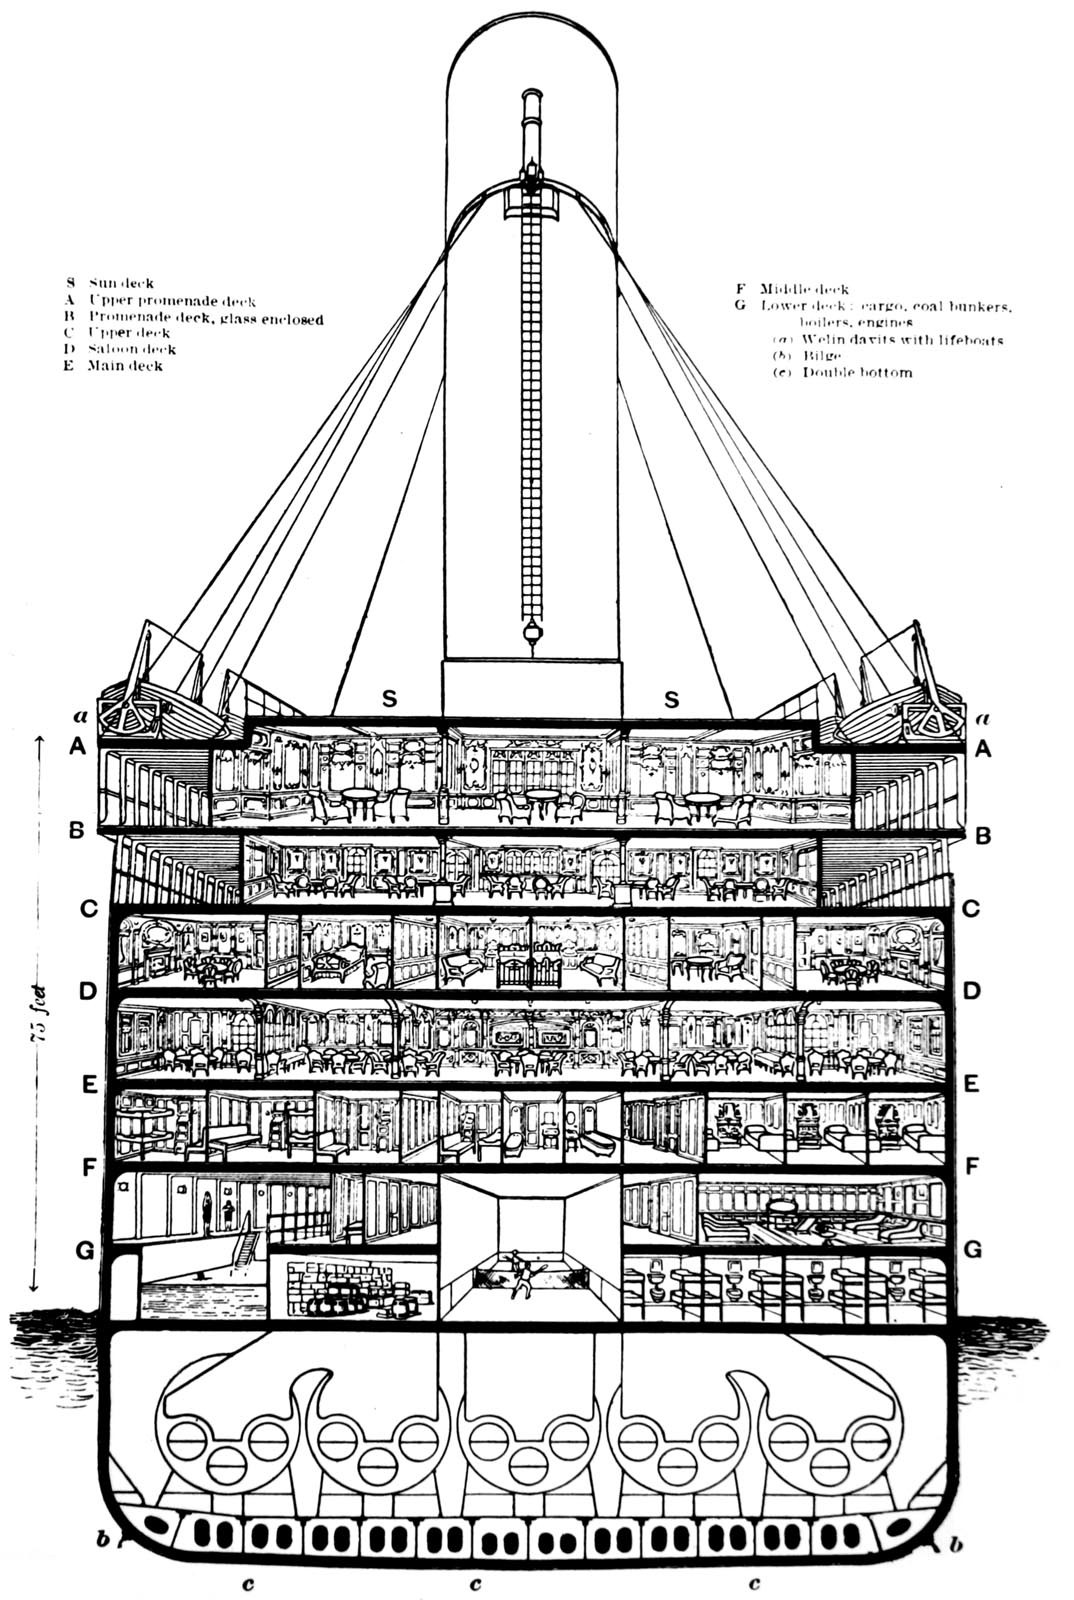


- Pclass: 등급이 높을수록 생존률이 높은 경향을 보였다.
- Sex: 여성이 남성보다 생존률이 높은 경향을 보였다.
- Family: 가족이 1~3명인 경우 생존률이 높다.(본인 제외) - 4인가족인 경우 생존률이 가장 높았다.
- Cabin: A, G, C, F, B, E, D 순서로 생존률이 높았다.
- Fare_log_dgt: 7, 5, 6, 4, 3, 1, 2 순서로 생존률이 높았다. (값이 클 수록 많은 Fare를 지출)
- Pclass & Fare_log_dgt: Pclass가 1이면서 많은 Fare를 지출한 사람들이 많이 생존했다. 하지만 Pclass가 2인 경우 많은 Fare를 지출했다고 해서 생존률이 높지는 않았다. Pclass가 3인 경우 미미하게 생존률이 증가하기는 했지만 대체적으로 낮은 생존률을 보였다. 비슷한 요금을 지불했음에도 Pclass별로 생존률이 차이났음을 알 수 있다. 여기서 배의 구조가 생존률에 영향을 끼쳤을 가능성이 있다고 생각되었다.
![image-2.png](attachment:image-2.png)
https://www.anatomynote.com/wp-content/uploads/2019/09/15465/Titanic-sectional-structure-diagram.jpg
https://www.anatomynote.com/transportation-anatomy/ship-anatomy/titanic-sectional-structure-diagram/
- 타이타닉호는 알파벳 순서로 갑판과 가장 가깝고, 많은 비용Fare를 지출하는 구조였다. 
    - S(일광욕용 갑판Sun deck)
    - A(상부 산책로 갑판Upper promenade deck): 배를 둘러싼 복도가 외부로 뚫려 있어 산책할 수 있다. 1등실 객실, 라운지, 흡연실, 독서실, 야자수 코트
    - B(선교루 갑판Promenade deck), glass enclosed: 1등급 객실, 레스토랑, 카페, 선미 부분에 3등실 산책로
    - C(상층 갑판Upper deck): 3등실 산책로, 선원 숙소, 3등실 전용 휴게실과 흡연실, 1등실 객실, 2등실 도서관
    - D(살롱 갑판Saloon deck): 1등실 대합실, 1등실 식당, 2등실 식당, 1,2,3등급 객실, 화부 숙소
    - E(메인 갑판Main deck): 1, 2, 3등실 객실 및 선원숙소
    - F(중간 갑판Middle deck): 대부분의 3등실 객실과 2등 객실 및 선원숙소, 3등실 식당, 1등실용 수영장
    - G(하부 갑판Lower deck): 객실이 있는 가장 낮은 갑판, 스쿼시장, 창고, 보일러실, 기관실 등

1. Fare가 높을 수록 Pclass가 낮다(대우도 성립).
2. Fare가 높고, Pclass가 낮을수록 배의 윗부분Cabin에서 주로 생활했다.
3. 다만 fare_log_dgt와 Pclass의 상관관계에서 0.39에 해당하는 사람들은 다른 Pclass와 Cabin 위치가 섞인 경우다.

### 만약 Cabin의 결측치가 적었다면?

- cabin 있는지 여부
- cabin 위치 인코딩

In [645]:
print(train["Cabin"].isna().value_counts())
print(test["Cabin"].isna().value_counts())

True     687
False    204
Name: Cabin, dtype: int64
True     327
False     91
Name: Cabin, dtype: int64


In [646]:
combined_data = [train,test]

In [647]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [648]:
for data in combined_data:
    data["Cabin"] = data["Cabin"].str.extract('([A-Za-z]+)', expand = False)
    
train.Cabin.head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

In [649]:
# for data in combined_data:
#     data["Cabin_order"] = data["Cabin"].str.extract(' ([A-Za-z]+)\.', expand = False)
    
# Cabin_mapping = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
# for data in combined_data:
#     data["Cabin_order"] = data["Cabin_order"].map(Cabin_mapping)

In [650]:

# Cabin 없는 사람 0 처리

#train["Cabin"] = train["Cabin"].fillna(0)

# for i in range(891):
#     if(train.at[i,"Cabin"]!=0):
# #         if (train.at[i,"Cabin"]=1):

# # A ~ G 객실별 ordinal encoding
# for data in combined_data:
#     data["Cabin_order"] = data["Cabin"].str.extract(' ([A-Za-z]+)\.', expand = False)
    


In [651]:
cabin_rate = train.groupby(['Cabin','Survived']).count()
    # Title로 사망자 집계
    # 0: 사망
    # 1: 생존
cabin_rate

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Fare  \
Cabin Survived                                                            
A     0                   8       8     8    8    5      8      8     8   
      1                   7       7     7    7    7      7      7     7   
B     0                  12      12    12   12   11     12     12    12   
      1                  35      35    35   35   34     35     35    35   
C     0                  24      24    24   24   21     24     24    24   
      1                  35      35    35   35   30     35     35    35   
D     0                   8       8     8    8    8      8      8     8   
      1                  25      25    25   25   23     25     25    25   
E     0                   8       8     8    8    8      8      8     8   
      1                  24      24    24   24   22     24     24    24   
F     0                   5       5     5    5    4      5      5     5   
      1                   8       8     8    8    7      8      8     8   
G     0                   2       2     2    2    2      2      2     2   
      1                   2       2     2    2    2      2      2     2   
T     0                   1       1     1    1    1      1      1     1   

                Embarked  Prefix  Family  Age_log  Fare_log  Age_dgt  \
Cabin Survived                                                         
A     0                8       8       8        5         8        8   
      1                7       7       7        7         7        7   
B     0               12      12      12       11        12       12   
      1               33      35      35       34        35       35   
C     0               24      24      24       21        24       24   
      1               35      35      35       30        35       35   
D     0                8       8       8        8         8        8   
      1               25      25      25       23        25       25   
E     0                8       8       8        8         8        8   
      1               24      24      24       22        24       24   
F     0                5       5       5        4         5        5   
      1                8       8       8        7         8        8   
G     0                2       2       2        2         2        2   
      1                2       2       2        2         2        2   
T     0                1       1       1        1         1        1   

                Fare_dgt  Family_dgt  Fare_log_dgt  
Cabin Survived                                      
A     0                8           8             8  
      1                7           7             7  
B     0               12          12            12  
      1               35          35            35  
C     0               24          24            24  
      1               35          35            35  
D     0                8           8             8  
      1               25          25            25  
E     0                8           8             8  
      1               24          24            24  
F     0                5           5             5  
      1                8           8             8  
G     0                2           2             2  
      1                2           2             2  
T     0                1           1             1

In [652]:
    # Cabin별 생존자
cabin_count = pd.DataFrame(cabin_rate.Prefix)
cabin_count = cabin_count.reset_index()
cabin_count = cabin_count.groupby(['Survived','Cabin']).sum()
cabin_count = cabin_count.reset_index()

In [653]:
cabin_count_set = set(cabin_count['Cabin'])
cabin_count_list = list(cabin_count_set)
len(cabin_count_list)

8

In [654]:
cabin_count = cabin_count.reset_index()

In [655]:
cabin_count

index  Survived Cabin  Prefix
0       0         0     A       8
1       1         0     B      12
2       2         0     C      24
3       3         0     D       8
4       4         0     E       8
5       5         0     F       5
6       6         0     G       2
7       7         0     T       1
8       8         1     A       7
9       9         1     B      35
10     10         1     C      35
11     11         1     D      25
12     12         1     E      24
13     13         1     F       8
14     14         1     G       2

In [656]:
# pclass등급별 가장 많이 있는 객실cabin 알아보기
num_list= list(range(1,4))
cab_list = []


for n in range(1,4):
    nan_df = pd.DataFrame(train[train["Pclass"] == n]["Cabin"].value_counts()).reset_index()
    nan_df["Cab_type"] = nan_df["index"]
    nan = nan_df.Cabin.max()
    nan_cab = nan_df[nan_df["Cabin"]== nan]["Cab_type"]
    cab_list.append(nan_cab) 
cab_list= pd.DataFrame(cab_list).reset_index()
cab_list= cab_list.drop("index", 1)
cab_list["Cabin"] = cab_list[0]
cab_list = cab_list.drop(0,1)
cab_list["Pclass"] = [1,2,3]

cab_list

# pclass=1이 제일 많았던 곳은 C
# pclass=2,3이 제일 많았던 곳은 F

Cabin  Pclass
0     C       1
1     F       2
2     F       3

In [657]:
#일단 결측치를 N으로 처리
import numpy as np
train["Cabin"] = train.Cabin.replace(np.nan, 'N')

#결측치 N을 등급별 가장 많이 있던 Cabin으로 바꾸기

for n in range(0, len(train)):
    if train["Cabin"][n] == 'N':
        if train['Pclass'][n] == 1:
            train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==1].unique()[0]
        elif train['Pclass'][n] == 2:
            train['Cabin'][n] = cab_list.Cabin[cab_list["Pclass"]==2].unique()[0]
        else:
            train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==3].unique()[0]
    else:
        train['Cabin'][n] = train['Cabin'][n]

<ipython-input-657-514e0ca3cf45>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==3].unique()[0]
<ipython-input-657-514e0ca3cf45>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cabin'][n] = train['Cabin'][n]
<ipython-input-657-514e0ca3cf45>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==3].unique()[0]
<ipython-inp

In [658]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Prefix       417 non-null    float64
 11  Family       418 non-null    int64  
 12  Fare_log     417 non-null    float64
 13  Age_log      332 non-null    float64
 14  Family_dgt   418 non-null    int64  
dtypes: float64(5), int64(6), object(4)
memory usage: 49.1+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

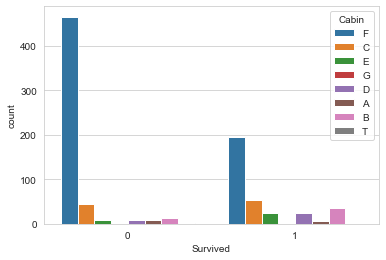

In [659]:
sns.countplot(x = "Survived", hue = "Cabin", data= train)

In [660]:
#test["Cabin"] = pd.to_numeric(test["Cabin"], downcast="integer")

# train["Cabin_order"] = train["Cabin_order"].astype(int)
# test["Cabin_order"] = test["Cabin_order"].astype(int)


<AxesSubplot:>

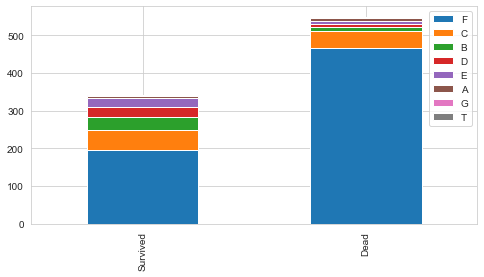

In [661]:
survived = train[train["Survived"]==1]["Cabin"].value_counts()
dead = train[train["Survived"]==0]["Cabin"].value_counts()
df_cabin = pd.DataFrame([survived,dead])
df_cabin.index = ["Survived","Dead"]
df_cabin.plot(kind="bar",stacked = True, figsize = (8,4))


> **1.1.6. Cabin & Survived**

In [662]:
# Cabin과 생존률survive의 관계
list_p = []
for n in range(0,8):
    # 사망자/ (사망자 + 생존자) * 100
    p = cabin_count.Prefix[n]/(cabin_count.Prefix[n]+cabin_count.Prefix[n+7])*100
    list_p.append( [cabin_count.Cabin[n] , p] )
list_deck_point = pd.DataFrame(list_p)

In [663]:
list_deck_point['rate'] = list_deck_point[1]
list_deck_point = list_deck_point.drop(1,1)
list_deck_point.sort_values(by=['rate'], axis=0, ascending=False)

0       rate
0  A  88.888889
1  B  63.157895
2  C  40.677966
7  T  33.333333
4  E  24.242424
6  G  20.000000
3  D  18.604651
5  F  17.241379

In [664]:
# 생존률에 따라 점수 부여

cabin_mapping = {"A": 89, "G": 63, "C": 40, "T":33, "F":24, "B":20,"E":19,"D":17} 
train['Cabin_score'] = train['Cabin'].map(cabin_mapping)
train.Cabin_score.head()

0    24
1    40
2    24
3    40
4    24
Name: Cabin_score, dtype: int64

- 비록 사용할 수 없는 데이터지만 점수까지 부여해 보았다.
- A, B, C, T, E, G, D, F 순서로 생존률이 높았다
- T는 데이터가 하나 밖에 없기 때문에 삭제하는 편이 성능을 높일 것으로 보인다.
- T값을 33 혹은 조정치를 적용했을 때 모두 cabin_score과 survived의 관계는 낮았다.

In [665]:
# test["Cabin"] = pd.to_numeric(test["Cabin"], downcast="integer")

## 2. 전처리

### 1.1. 결측치 전처리

#### 1.1.1. Age 전처리

In [666]:
train.groupby(['Prefix'])['Age'].agg(['mean', 'median'])

mean  median
Prefix                   
0       30.197638    28.0
1       22.020000    21.5
2       35.898148    35.0
3       42.950000    44.5

In [667]:
#Mr, Mrs, Miss별 나이의 중앙값을 나이의 결측치에 넣기

train["Age"].fillna(train.groupby("Prefix")["Age"].transform("median"), inplace=True)
train.groupby("Prefix")["Age"].transform("median")

0      28.0
1      35.0
2      21.5
3      35.0
4      28.0
       ... 
886    44.5
887    21.5
888    21.5
889    28.0
890    28.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

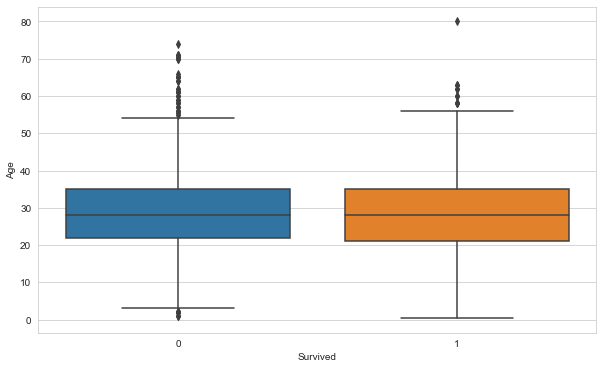

In [668]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Survived",y="Age",data=train)

In [712]:
train["Age_log"] =  np.log(train["Age"]+ 1)
test["Age_log"] =  np.log(test["Age"]+ 1)

<AxesSubplot:>

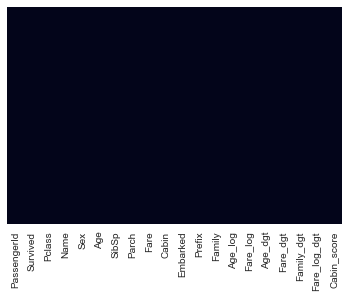

In [713]:
# 결측치 확인
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

- 생존률: 여성 > 남성
- 사망률: 여성 < 남성

In [698]:
train["Age"] = pd.to_numeric(train["Age"], downcast="integer")
test["Age"] = pd.to_numeric(test["Age"], downcast="integer")

- age를 pclass별로 묶을 수도 있다.

In [671]:
# avg_first = train["Age"][train["Pclass"]==1].mean()
# avg_second = train["Age"][train["Pclass"]==2].mean()
# avg_third = train["Age"][train["Pclass"]==3].mean()
# for data in combined_data:
#     data["Age"] = data["Age"].fillna(0)
    
# for i in range(891):
#     if(train.at[i,"Age"]==0):
#         if(train.at[i,"Pclass"]==1):
#             train.at[i,"Age"]=avg_first
#         elif(train.at[i,"Pclass"]==2):
#             train.at[i,"Age"]=avg_second
#         else:
#             train.at[i,"Age"]=avg_third
# for i in range(418):
#     if(test.at[i,"Age"]==0):
#         if(test.at[i,"Pclass"]==1):
#             test.at[i,"Age"]=avg_first
#         elif(test.at[i,"Pclass"]==2):
#             test.at[i,"Age"]=avg_second
#         else:
#             test.at[i,"Age"]=avg_third

#### 1.1.2. Embarked 전처리

In [700]:
# embarked null값을 가장 많이 탄 곳으로 변환
# mode(): 최빈값
freq_port_tr = train.Embarked.dropna().mode()[0]
freq_port_ts = test.Embarked.dropna().mode()[0]
freq_port_tr


0

In [701]:
# 제일 많은 Southhampton으로 결측치 처리

train['Embarked'] = train['Embarked'].fillna(freq_port_tr)
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

test['Embarked'] = test['Embarked'].fillna(freq_port_ts)
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

#### 1.1.3. Sex 전처리

In [674]:
dummy = pd.get_dummies(train["Sex"])
train["Sex"] = dummy["female"]

In [675]:
dummy2 = pd.get_dummies(test["Sex"])
test["Sex"] = dummy2["female"]
test["Sex"]

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: uint8

In [676]:
# emb_dummies_tr = pd.get_dummies(train["Embarked"])
# train["Q"] = emb_dummies_tr["Q"]
# train["S"] = emb_dummies_tr["S"]
# train.drop(columns="Embarked",inplace = True)

In [677]:
# emb_dummies_ts = pd.get_dummies(test["Embarked"])
# test["Q"] = emb_dummies_ts["Q"]
# test["S"] = emb_dummies_ts["S"]
# test.drop(columns="Embarked",inplace = True)

In [678]:
# train.drop(columns = "PassengerId", inplace = True)
# test.drop(columns = "PassengerId", inplace = True)


In [680]:
# train.drop(columns = "Ticket", inplace = True)
# test.drop(columns = "Ticket", inplace = True)

# train.drop(columns = "Cabin", inplace = True)
# test.drop(columns = "Cabin", inplace = True)

In [681]:
# train["Cabin"] = train["Cabin_order"]
# test["Cabin"] = test["Cabin_order"]

# train.drop(columns = "Cabin_order", inplace = True)
# test.drop(columns = "Cabin_order", inplace = True)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

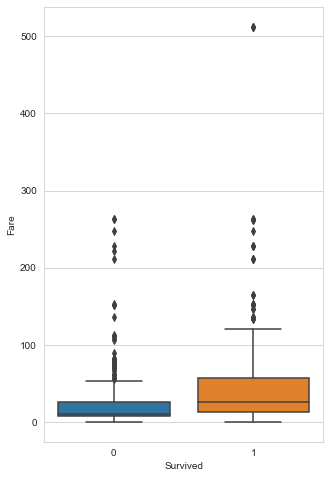

In [683]:
plt.figure(figsize=(5,8))
sns.boxplot(x="Survived",y="Fare",data=train)


In [684]:
fare_first = train["Fare"][train["Pclass"]==1].mean()
fare_second = train["Fare"][train["Pclass"]==2].mean()
fare_third = train["Fare"][train["Pclass"]==3].mean()
print("Average Fare for First class Passenger : ",fare_first)
print("Average Fare for Second class Passenger : ",fare_second)
print("Average Fare for Third class Passenger : ",fare_third)

Average Fare for First class Passenger :  84.1546875
Average Fare for Second class Passenger :  20.662183152173913
Average Fare for Third class Passenger :  13.675550101832993


c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

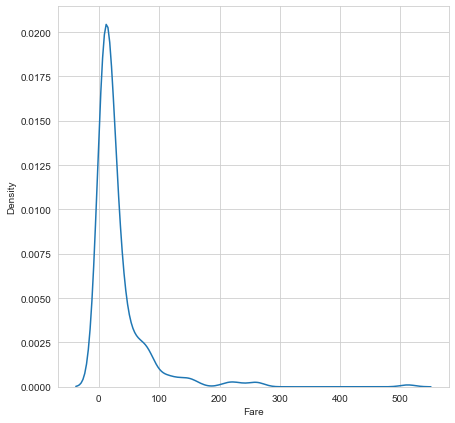

In [685]:
#Fare데이터 분포 확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Fare"],  hist=False)

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

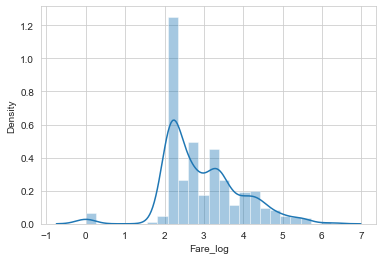

In [686]:
#Fare 로그처리 -> 정규분포로 바꿔주기
train["Fare_log"] =  np.log(train["Fare"] + 1)

#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Fare_log"])

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

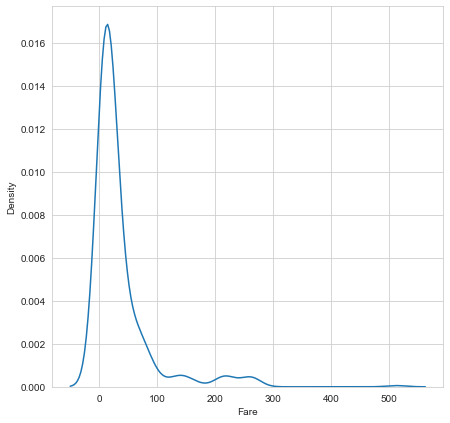

In [687]:
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(test["Fare"],  hist=False)


c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

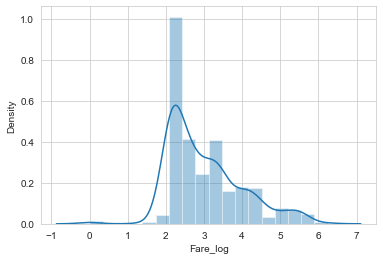

In [688]:
test["Fare_log"] =  np.log(test["Fare"] + 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(test["Fare_log"])

In [689]:
test["Fare"] = test["Fare"].fillna(0)

for i in range(418):
    if(test.at[i,"Fare"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Fare"]=fare_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Fare"]=fare_second
        else:
            test.at[i,"Fare"]=fare_third

In [690]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    uint8  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Fare          891 non-null    float64
 9   Cabin         891 non-null    object 
 10  Embarked      891 non-null    int32  
 11  Prefix        891 non-null    int64  
 12  Family        891 non-null    int64  
 13  Age_log       714 non-null    float64
 14  Fare_log      891 non-null    float64
 15  Age_dgt       891 non-null    int64  
 16  Fare_dgt      891 non-null    int64  
 17  Family_dgt    891 non-null    int64  
 18  Fare_log_dgt  891 non-null    

## 3. Classification

### 3.1. 상관관계

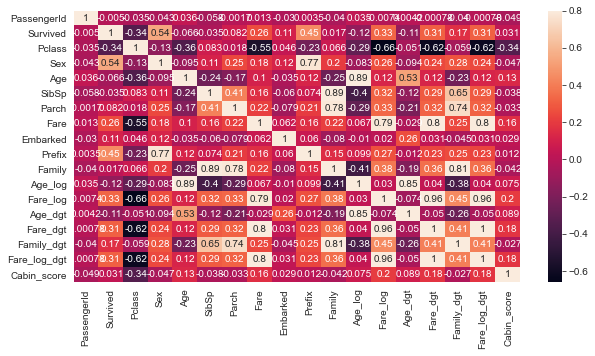

In [691]:
# 히트맵

correlation_matrix = train.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True) 
plt.show()

# Survived의 상관관계를 보면
# Fare_log가 -0.66으로 높다
# Age 남기고 Age_log, Age_log2, Fare, Fare_log2 삭제

> **Survived와 관계**
1. Sex: 0.54
2. Title: 0.44
3. Pclass: -0.34
4. Fare_log: 0.33

- 컬럼 삭제: 절대값 0.1 미만, 중복되는 값(fare, fare_log 등)

In [692]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'Prefix', 'Family', 'Age_log',
       'Fare_log', 'Age_dgt', 'Fare_dgt', 'Family_dgt', 'Fare_log_dgt',
       'Cabin_score'],
      dtype='object')

In [693]:
train_df = train[['Survived','Pclass','Sex','Embarked','Prefix','Fare_log','Age_log','Family_dgt']]

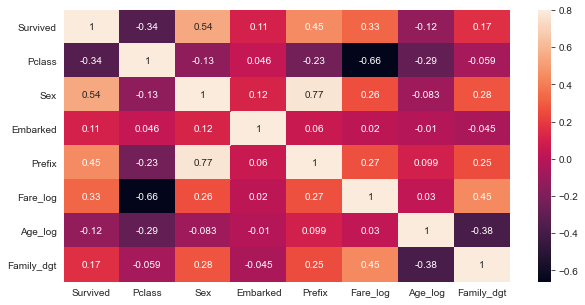

In [694]:
correlation_matrix = train_df.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True) 
plt.show()

> **Survived와 관계**
1. Sex: 0.54
2. Prefix: 0.45
3. Pclass: -0.34
4. Fare_log: 0.33
5. Family_dgt: 0.2
6. Age_log: -0.12
7. Embarked: 0.11

하지만 Sex와 Prefix는 매우 유사한 피처이며, 상관관계도 매우 높기 때문에 Survived와 더 높은 상관관계를 갖는 Sex를 남기고 Prefix는 제거

In [702]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    uint8  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Fare          891 non-null    float64
 9   Cabin         891 non-null    object 
 10  Embarked      891 non-null    int32  
 11  Prefix        891 non-null    int64  
 12  Family        891 non-null    int64  
 13  Age_log       714 non-null    float64
 14  Fare_log      891 non-null    float64
 15  Age_dgt       891 non-null    int64  
 16  Fare_dgt      891 non-null    int64  
 17  Family_dgt    891 non-null    int64  
 18  Fare_log_dgt  891 non-null    

In [708]:
train["Age"] = train["Age"].astype(int)

In [715]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    uint8  
 5   Age           891 non-null    int32  
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Fare          891 non-null    float64
 9   Cabin         891 non-null    object 
 10  Embarked      891 non-null    int32  
 11  Prefix        891 non-null    int64  
 12  Family        891 non-null    int64  
 13  Age_log       891 non-null    float64
 14  Fare_log      891 non-null    float64
 15  Age_dgt       891 non-null    int64  
 16  Fare_dgt      891 non-null    int64  
 17  Family_dgt    891 non-null    int64  
 18  Fare_log_dgt  891 non-null    

In [696]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'Prefix', 'Family', 'Age_log',
       'Fare_log', 'Age_dgt', 'Fare_dgt', 'Family_dgt', 'Fare_log_dgt',
       'Cabin_score'],
      dtype='object')

In [717]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure

train_df, test_df = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass','Sex','Embarked','Fare_log','Age_log',"Family_dgt"]

X_train=train_df[target_col]
Y_train=train_df['Survived']

X_test=test_df[target_col]
Y_test=test_df['Survived']

features_one = X_train.values

target = Y_train.values

tree_model = DecisionTreeClassifier()
tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_prediction, Y_test))


The accuracy of the Decision Tree is 0.7649253731343284


In [719]:
# predict test data with pre-trained tree model
test_features = test_df[target_col].values
dt_prediction_result = tree_model.predict(test_features)

# # Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
# PassengerId = np.array(test["PassengerId"]).astype(int)
# dt_solution = pd.DataFrame(dt_prediction_result, PassengerId, columns = ["Survived"])
# # Write your solution to a csv file with the name my_solution.csv
# dt_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"]) 

In [ ]:
# X = train_df
# Y = train["Survived"]
# X_TEST = test[['Pclass','Sex','Embarked','Fare_log','Age_log',"Family_dgt"]]

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

In [720]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(Y_test,yhat))
    print("For k = ",i," : ",accuracy_score(Y_test,yhat))

For k =  1  :  0.7611940298507462
For k =  2  :  0.7761194029850746
For k =  3  :  0.7835820895522388
For k =  4  :  0.7985074626865671
For k =  5  :  0.7947761194029851
For k =  6  :  0.7835820895522388
For k =  7  :  0.7649253731343284
For k =  8  :  0.7910447761194029
For k =  9  :  0.7873134328358209
For k =  10  :  0.7873134328358209
For k =  11  :  0.8022388059701493
For k =  12  :  0.8022388059701493
For k =  13  :  0.7947761194029851
For k =  14  :  0.8022388059701493
For k =  15  :  0.7985074626865671
For k =  16  :  0.8208955223880597
For k =  17  :  0.8208955223880597
For k =  18  :  0.8097014925373134
For k =  19  :  0.8059701492537313


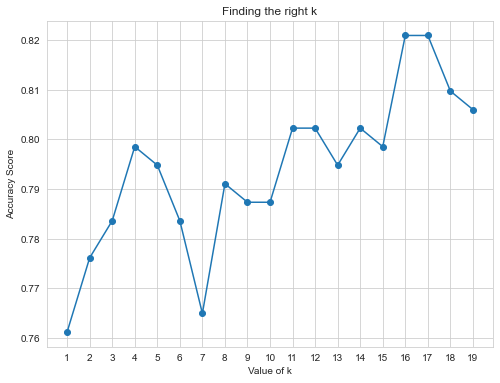

In [721]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

In [722]:
KNN = KNeighborsClassifier(n_neighbors = 16)
KNN.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=16)

In [723]:
y_pred = KNN.predict(X_test)


In [725]:
df_KNN = pd.DataFrame()
df_KNN["PassengerId"] = test_df["PassengerId"]
df_KNN["Survived"] = y_pred

# Decision Tree

In [728]:
from sklearn.tree import DecisionTreeClassifier


depth = [];

for i in range(1,20):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,Y_train)
    yhat = clf_tree.predict(X_test)
    depth.append(accuracy_score(Y_test,yhat))
    print("For max depth = ",i, " : ",accuracy_score(Y_test,yhat))

For max depth =  1  :  0.7873134328358209
For max depth =  2  :  0.7947761194029851
For max depth =  3  :  0.8097014925373134
For max depth =  4  :  0.8134328358208955
For max depth =  5  :  0.8097014925373134
For max depth =  6  :  0.7947761194029851
For max depth =  7  :  0.7947761194029851
For max depth =  8  :  0.7985074626865671
For max depth =  9  :  0.7985074626865671
For max depth =  10  :  0.7835820895522388
For max depth =  11  :  0.7873134328358209
For max depth =  12  :  0.7835820895522388
For max depth =  13  :  0.7873134328358209
For max depth =  14  :  0.7947761194029851
For max depth =  15  :  0.7835820895522388
For max depth =  16  :  0.7985074626865671
For max depth =  17  :  0.7798507462686567
For max depth =  18  :  0.8022388059701493
For max depth =  19  :  0.7910447761194029


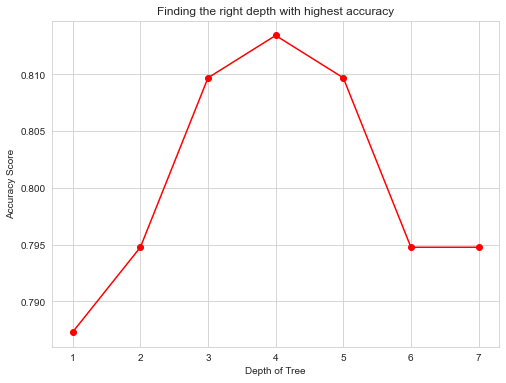

In [727]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()

In [729]:
clf_tr = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 3)
clf_tr.fit(X_train,Y_train)
pred_tree = clf_tr.predict(X_test)
df_TREE = pd.DataFrame()
df_TREE["PassengerId"] = test_df["PassengerId"]
df_TREE["Survived"] = pred_tree
df_TREE.head()

PassengerId  Survived
495          496         0
648          649         0
278          279         0
31            32         1
255          256         1

In [730]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=100)
model

DecisionTreeClassifier(random_state=100)

In [731]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=100)

In [732]:
y_predict = model.predict(X_test, )
y_predict[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [733]:
# train과 test값을 다르게 예측한 데이터 개수
(y_predict != Y_test).sum()

58

In [734]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_predict) * 100

78.35820895522389

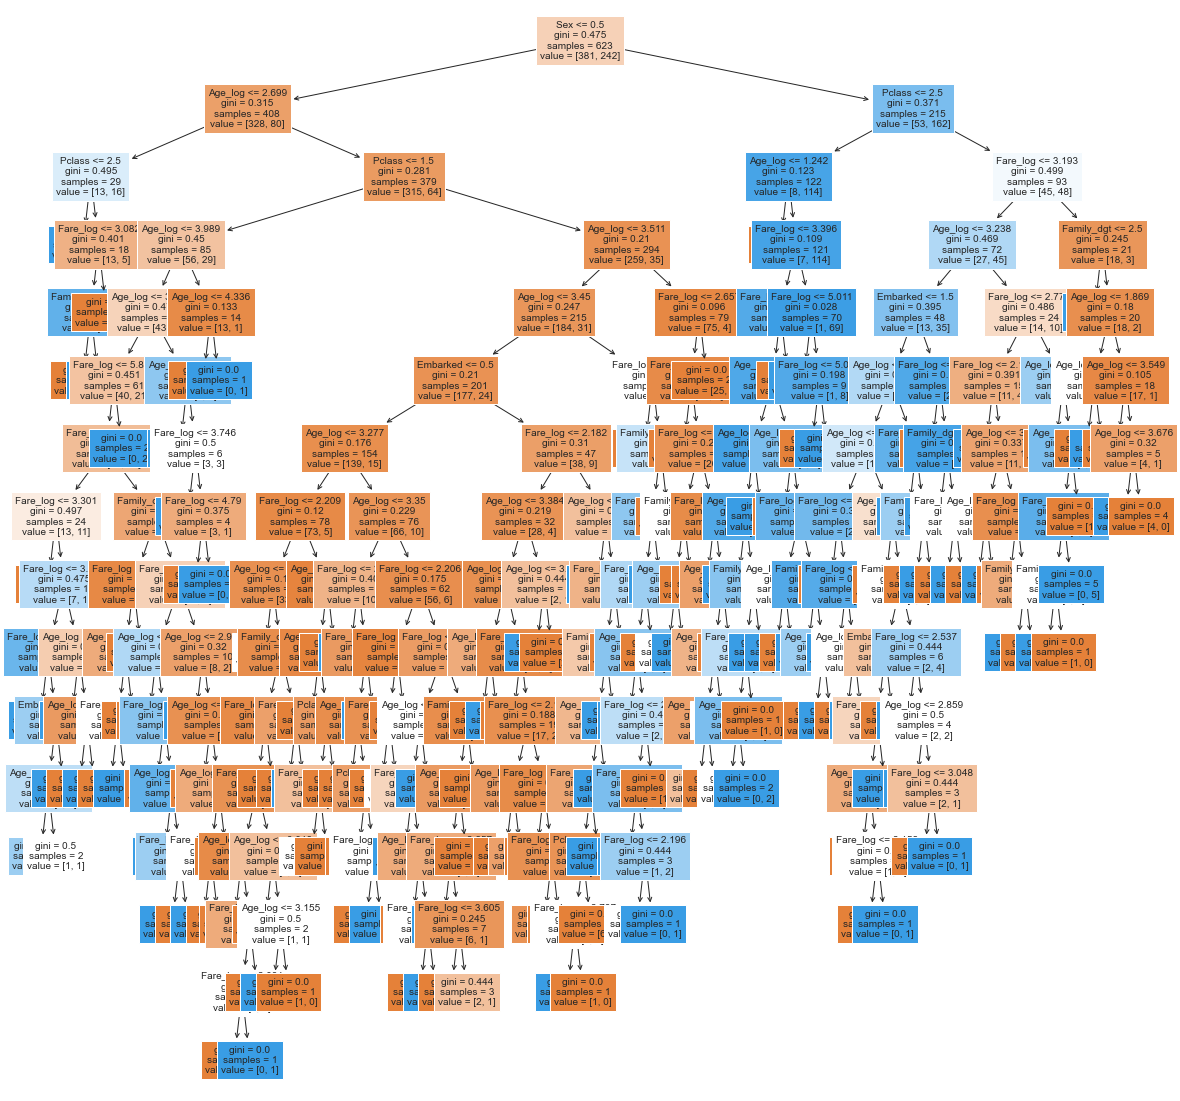

In [735]:
#라이브러리 불러오기
from sklearn.tree import plot_tree
#트리 알고리즘 시각화하기 (plot_tree(의사결정나무(_알고리즘),의사결정에 사용한 칼럼 지정해주기))
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=target_col,
                 filled=True, fontsize=10)

In [736]:
# 중요도 분석
model.feature_importances_

array([0.12036643, 0.3117704 , 0.0103159 , 0.27204052, 0.23187549,
       0.05363126])

<AxesSubplot:>

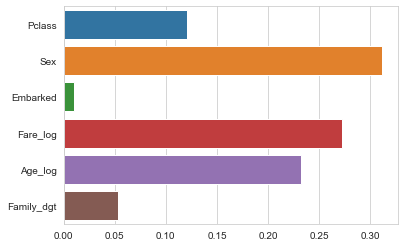

In [739]:
sns.barplot(x=model.feature_importances_, y=target_col)

In [744]:
#score 함수 사용해서 정확도 구하기
model.score(X_test, Y_test) * 100

78.35820895522389

In [745]:
from sklearn.metrics import accuracy_score
for max_depth in range(1,15):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(X_train, Y_train).predict(X_test)
    score = accuracy_score(Y_test, y_predict)*100
    print(max_depth, score)

1 78.73134328358209
2 79.47761194029852
3 80.97014925373134
4 81.34328358208955
5 80.97014925373134
6 79.8507462686567
7 80.59701492537313
8 82.46268656716418
9 82.46268656716418
10 77.98507462686567
11 79.47761194029852
12 76.86567164179104
13 77.98507462686567
14 77.61194029850746


# Random Forest

In [746]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,Y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(Y_test,yhat))

Accuracy for training data :  0.8283582089552238


In [748]:
clf_for = RandomForestClassifier(random_state=0)
clf_for.fit(X_train,Y_train)
y_forest = clf_for.predict(X_test)
df_FOREST = pd.DataFrame()
df_FOREST["PassengerId"] = test_df["PassengerId"]
df_FOREST["Survived"] = y_forest
df_FOREST.head()

PassengerId  Survived
495          496         0
648          649         0
278          279         0
31            32         1
255          256         0

In [749]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [750]:
y_predict = model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [751]:
# train과 test값을 다르게 예측한 데이터 개수
(y_predict != Y_test).sum()

50

In [752]:
accuracy_score(Y_test, y_predict) * 100

81.34328358208955

In [753]:
# 중요도 분석
model.feature_importances_

array([0.09310341, 0.25710292, 0.04638258, 0.27665325, 0.27471154,
       0.0520463 ])

<AxesSubplot:>

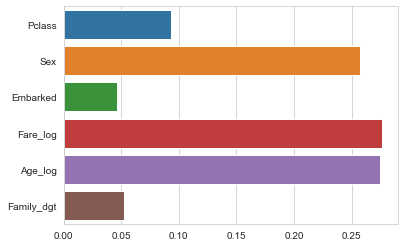

In [754]:
sns.barplot(x=model.feature_importances_, y=target_col)

In [755]:
#score 함수 사용해서 정확도 구하기
model.score(X_test, Y_test) * 100

81.34328358208955

In [756]:
from sklearn.metrics import accuracy_score
for max_depth in range(1,15):
    model = RandomForestClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(X_train, Y_train).predict(X_test)
    score = accuracy_score(Y_test, y_predict)*100
    print(max_depth, score)

1 77.98507462686567
2 79.1044776119403
3 80.22388059701493
4 79.8507462686567
5 80.97014925373134
6 80.97014925373134
7 81.71641791044776
8 82.46268656716418
9 84.32835820895522
10 83.2089552238806
11 82.46268656716418
12 83.2089552238806
13 82.46268656716418
14 82.08955223880598


### SVM

In [757]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train,Y_train)
yhat = clf_svm.predict(X_test)
clf_SVM = SVC(gamma='auto')
clf_SVM.fit(X_train,Y_train)
pred_svm = clf_SVM.predict(X_test)
df_SVM = pd.DataFrame()
df_SVM["PassengerId"] = test_df["PassengerId"]
df_SVM["Survived"] = pred_svm
df_SVM.head()

PassengerId  Survived
495          496         0
648          649         0
278          279         0
31            32         1
255          256         1

### GaussianNB

In [758]:
from sklearn.naive_bayes import GaussianNB



clf_NB = GaussianNB()
clf_NB.fit(X_train,Y_train)
y_hat = clf_NB.predict(X_test)
print("Accuracy for training data : ",accuracy_score(Y_test,y_hat))

Accuracy for training data :  0.7873134328358209


In [759]:
clf_NB = GaussianNB()
clf_NB.fit(X_train,Y_train)
pred_NB = clf_NB.predict(X_test)
df_NB = pd.DataFrame()
df_NB["PassengerId"] = test_df["PassengerId"]
df_NB["Survived"] = pred_NB
df_NB.head()

PassengerId  Survived
495          496         0
648          649         0
278          279         1
31            32         1
255          256         1

### Logistic Regression

In [763]:
from sklearn.linear_model import LogisticRegression


regr = LogisticRegression(solver='liblinear', random_state=1)
regr.fit(X_train,Y_train)
yhat = regr.predict(X_test)
print("Accuracy for training data : ",accuracy_score(Y_test,y_hat))

Accuracy for training data :  0.7873134328358209


In [764]:
reg = LogisticRegression(solver='liblinear', random_state=1)
reg.fit(X_train,Y_train)
y_LR = reg.predict(X_test)
df_LR = pd.DataFrame()
df_LR["PassengerId"] = test_df["PassengerId"]
df_LR["Survived"] = y_LR
df_LR.head()

PassengerId  Survived
495          496         0
648          649         0
278          279         0
31            32         1
255          256         1

### SGD

In [767]:
from sklearn.linear_model import SGDClassifier


clf_SGD = SGDClassifier(loss="squared_loss", penalty="l2", max_iter=4500,tol=-1000, random_state=1)
clf_SGD.fit(X_train,Y_train)
yhat = clf_SGD.predict(X_test)
print(accuracy_score(Y_test,yhat))

0.373134328358209


In [768]:
clf_SGD = SGDClassifier(loss="squared_loss", penalty="l2", max_iter=4500, tol=-1000, random_state=1)
clf_SGD.fit(X_train,Y_train)
y_SGD = clf_SGD.predict(X_test)
df_SGD = pd.DataFrame()
df_SGD["PassengerId"] = test_df["PassengerId"]
df_SGD["Survived"] = y_SGD
df_SGD.head()

PassengerId  Survived
495          496         1
648          649         1
278          279         1
31            32         1
255          256         1

NameError: name 'KNN_accuracy' is not defined

<Figure size 576x432 with 0 Axes>

### 3.3 GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model =GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_predict = model.predict(x_test)
y_predict[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [ ]:
# train과 test값을 다르게 예측한 데이터 개수
(y_predict != y_test).sum()

34

In [ ]:
accuracy_score(y_test, y_predict) * 100

81.00558659217877

In [ ]:
# 중요도 분석
model.feature_importances_

array([0.15560937, 0.05149866, 0.01951117, 0.4598688 , 0.11347929,
       0.19779162, 0.00224109])

<AxesSubplot:>

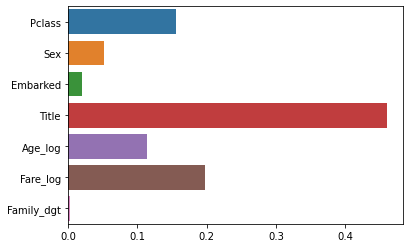

In [ ]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
#score 함수 사용해서 정확도 구하기
model.score(x_test, y_test) * 100

81.00558659217877

In [ ]:
from sklearn.metrics import accuracy_score
for max_depth in range(1,15):
    model = GradientBoostingClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(x_train, y_train).predict(x_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

1 79.88826815642457
2 80.44692737430168
3 81.00558659217877
4 84.35754189944134
5 85.47486033519553
6 83.79888268156425
7 83.79888268156425
8 84.35754189944134
9 83.24022346368714
10 84.91620111731844
11 84.35754189944134
12 84.35754189944134
13 82.12290502793296
14 82.68156424581005


### 3.4. lgbm

In [802]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(X_train, Y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.619964
[2]	valid_0's binary_logloss: 0.58761
[3]	valid_0's binary_logloss: 0.560042
[4]	valid_0's binary_logloss: 0.537564
[5]	valid_0's binary_logloss: 0.518631
[6]	valid_0's binary_logloss: 0.501219
[7]	valid_0's binary_logloss: 0.486517
[8]	valid_0's binary_logloss: 0.47436
[9]	valid_0's binary_logloss: 0.463447
[10]	valid_0's binary_logloss: 0.454909
[11]	valid_0's binary_logloss: 0.447442
[12]	valid_0's binary_logloss: 0.441558
[13]	valid_0's binary_logloss: 0.436237
[14]	valid_0's binary_logloss: 0.431599
[15]	valid_0's binary_logloss: 0.428118
[16]	valid_0's binary_logloss: 0.423819
[17]	valid_0's binary_logloss: 0.421037
[18]	valid_0's binary_logloss: 0.417307
[19]	valid_0's binary_logloss: 0.414163
[20]	valid_0's binary_logloss: 0.410846
[21]	valid_0's binary_logloss: 0.408365
[22]	valid_0's binary_logloss: 0.405997
[23]	valid_0's binary_logloss: 0.406577
[24]	valid_0's binary_logloss: 0.405044
[25]	valid_0's binary_logloss: 0.403519
[26]	valid_

c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [803]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, Pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [804]:
get_clf_eval(Y_test, preds, pred_proba)

오차 행렬
[[151  17]
 [ 26  74]]
정확도:0.8396, 정밀도:0.8132, 재현율:0.7400, F1:0.7749, AUC:0.8875


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

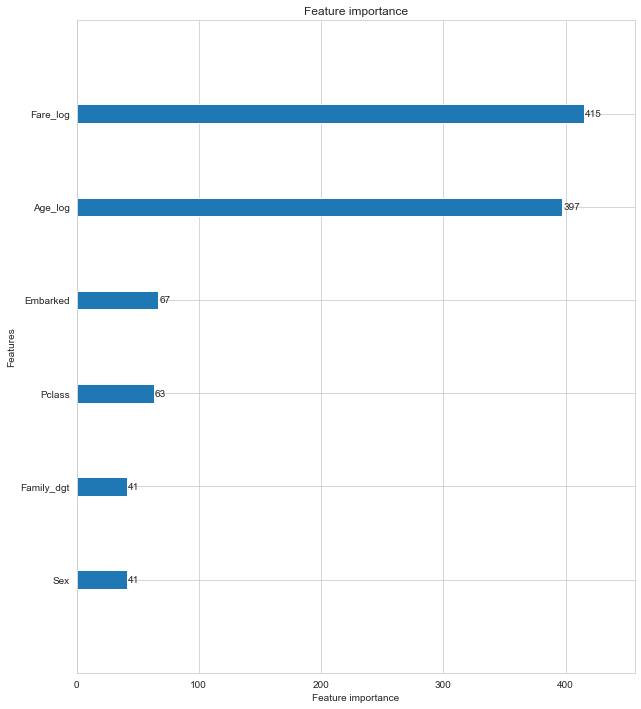

In [805]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)


### 3.5. Feature Engineering: RandomizedSearchCV 활용

In [792]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier


estimators = [DecisionTreeClassifier(random_state=42),
                        RandomForestClassifier(random_state=42), 
                        GradientBoostingClassifier(random_state=42),
                        #SGDClassifier(random_state=42), 
                        #LogisticRegression(random_state=42),
                        #GaussianNB,
                        #SVC(random_state=42),
                        LGBMClassifier(random_state=42)
                        
             ]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42),
 LGBMClassifier(random_state=42)]

In [793]:
max_depth = np.random.randint(2,20,10)

max_features = np.random.uniform(0.3,1.0,7)

In [794]:
results = []
for estimator in estimators:
    result =[]
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier'],
 ['LGBMClassifier']]

In [795]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(10, 100, 10)
       
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )
    # elif estimator.__class__.__name__ == 'SGDClassifier':
    #     loss="squared_loss", penalty="l2", max_iter=4500,tol=-1000, random_state=1

    clf.fit(X_train, Y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, Y_test))
    result.append(clf.cv_results_)
    results.append(result)

c:\Anaconda3\envs\python36\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 70 is smaller than n_iter=100. Running 70 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Unknown parameter: max_features


In [796]:
pd.DataFrame(results)

0  \
0      DecisionTreeClassifier   
1      RandomForestClassifier   
2  GradientBoostingClassifier   
3              LGBMClassifier   

                                                   1         2         3  \
0  {'max_features': 0.9794416042763252, 'max_dept...  0.812219  0.813433   
1  {'n_estimators': 30, 'max_features': 0.7540796...  0.821832  0.813433   
2  {'n_estimators': 50, 'max_features': 0.3391696...  0.825084  0.813433   
3  {'n_estimators': 89, 'max_features': 0.9949784...  0.828297  0.828358   

                                                   4  
0  {'mean_fit_time': [0.0030030250549316407, 0.00...  
1  {'mean_fit_time': [0.06425809860229492, 0.1259...  
2  {'mean_fit_time': [0.5446951866149903, 0.04383...  
3  {'mean_fit_time': [0.021619653701782225, 0.028...

In [807]:
# DecisionTree, RandomForestClassifier, GBM, LGBM 결과
r_search_result = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
r_search_result.sort_values('test_score', ascending=False)

estimator  \
3              LGBMClassifier   
0      DecisionTreeClassifier   
1      RandomForestClassifier   
2  GradientBoostingClassifier   

                                         best_params  train_score  test_score  \
3  {'n_estimators': 89, 'max_features': 0.9949784...     0.828297    0.828358   
0  {'max_features': 0.9794416042763252, 'max_dept...     0.812219    0.813433   
1  {'n_estimators': 30, 'max_features': 0.7540796...     0.821832    0.813433   
2  {'n_estimators': 50, 'max_features': 0.3391696...     0.825084    0.813433   

                                           cv_result  
3  {'mean_fit_time': [0.021619653701782225, 0.028...  
0  {'mean_fit_time': [0.0030030250549316407, 0.00...  
1  {'mean_fit_time': [0.06425809860229492, 0.1259...  
2  {'mean_fit_time': [0.5446951866149903, 0.04383...

### 3.6. Feature Engineering: GridSearchCV 활용 LGBM

In [809]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
         'max_depth':[100, 200],
         'min_child_samples':[60,100],
         'subsample':[0.8,1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, Y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train, Y_train),(X_test, Y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(Y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4}'.format(lgbm_roc_score))

c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning

[1]	valid_0's auc: 0.834911	valid_0's binary_logloss: 0.632903	valid_1's auc: 0.859792	valid_1's binary_logloss: 0.624467
[2]	valid_0's auc: 0.837119	valid_0's binary_logloss: 0.605169	valid_1's auc: 0.854256	valid_1's binary_logloss: 0.596287
[3]	valid_0's auc: 0.836902	valid_0's binary_logloss: 0.582134	valid_1's auc: 0.858363	valid_1's binary_logloss: 0.571724
[4]	valid_0's auc: 0.836381	valid_0's binary_logloss: 0.563525	valid_1's auc: 0.856935	valid_1's binary_logloss: 0.55262
[5]	valid_0's auc: 0.836902	valid_0's binary_logloss: 0.547697	valid_1's auc: 0.858363	valid_1's binary_logloss: 0.535418
[6]	valid_0's auc: 0.836902	valid_0's binary_logloss: 0.534389	valid_1's auc: 0.858363	valid_1's binary_logloss: 0.520708
[7]	valid_0's auc: 0.836902	valid_0's binary_logloss: 0.523467	valid_1's auc: 0.858363	valid_1's binary_logloss: 0.509294
[8]	valid_0's auc: 0.835421	valid_0's binary_logloss: 0.514074	valid_1's auc: 0.860179	valid_1's binary_logloss: 0.498277
[9]	valid_0's auc: 0.8369

c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning

[47]	valid_0's auc: 0.847617	valid_0's binary_logloss: 0.462165	valid_1's auc: 0.862649	valid_1's binary_logloss: 0.445587
[48]	valid_0's auc: 0.8474	valid_0's binary_logloss: 0.461328	valid_1's auc: 0.862292	valid_1's binary_logloss: 0.444999
[49]	valid_0's auc: 0.847335	valid_0's binary_logloss: 0.461114	valid_1's auc: 0.862649	valid_1's binary_logloss: 0.445203
[50]	valid_0's auc: 0.848165	valid_0's binary_logloss: 0.460677	valid_1's auc: 0.863214	valid_1's binary_logloss: 0.444535
[51]	valid_0's auc: 0.848479	valid_0's binary_logloss: 0.460386	valid_1's auc: 0.863274	valid_1's binary_logloss: 0.4443
[52]	valid_0's auc: 0.847872	valid_0's binary_logloss: 0.45977	valid_1's auc: 0.863095	valid_1's binary_logloss: 0.443917
[53]	valid_0's auc: 0.848002	valid_0's binary_logloss: 0.459641	valid_1's auc: 0.863155	valid_1's binary_logloss: 0.44379
[54]	valid_0's auc: 0.847807	valid_0's binary_logloss: 0.459255	valid_1's auc: 0.862321	valid_1's binary_logloss: 0.443485
[55]	valid_0's auc: 0.

c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning

[1]	valid_0's auc: 0.793876	valid_0's binary_logloss: 0.637023	valid_1's auc: 0.807083	valid_1's binary_logloss: 0.628914
[2]	valid_0's auc: 0.803106	valid_0's binary_logloss: 0.611781	valid_1's auc: 0.81997	valid_1's binary_logloss: 0.602589
[3]	valid_0's auc: 0.803106	valid_0's binary_logloss: 0.591871	valid_1's auc: 0.81997	valid_1's binary_logloss: 0.581915
[4]	valid_0's auc: 0.803106	valid_0's binary_logloss: 0.57529	valid_1's auc: 0.81997	valid_1's binary_logloss: 0.564515
[5]	valid_0's auc: 0.803106	valid_0's binary_logloss: 0.562097	valid_1's auc: 0.81997	valid_1's binary_logloss: 0.550783
[6]	valid_0's auc: 0.802309	valid_0's binary_logloss: 0.551038	valid_1's auc: 0.821101	valid_1's binary_logloss: 0.538784
[7]	valid_0's auc: 0.802309	valid_0's binary_logloss: 0.542022	valid_1's auc: 0.821101	valid_1's binary_logloss: 0.528904
[8]	valid_0's auc: 0.802309	valid_0's binary_logloss: 0.534751	valid_1's auc: 0.821101	valid_1's binary_logloss: 0.52128
[9]	valid_0's auc: 0.802309	va

c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning

[35]	valid_0's auc: 0.860166	valid_0's binary_logloss: 0.433262	valid_1's auc: 0.867946	valid_1's binary_logloss: 0.417908
[36]	valid_0's auc: 0.861467	valid_0's binary_logloss: 0.431592	valid_1's auc: 0.869762	valid_1's binary_logloss: 0.41723
[37]	valid_0's auc: 0.861521	valid_0's binary_logloss: 0.431105	valid_1's auc: 0.86756	valid_1's binary_logloss: 0.417719
[38]	valid_0's auc: 0.863257	valid_0's binary_logloss: 0.429653	valid_1's auc: 0.868869	valid_1's binary_logloss: 0.417389
[39]	valid_0's auc: 0.865095	valid_0's binary_logloss: 0.428221	valid_1's auc: 0.870119	valid_1's binary_logloss: 0.4164
[40]	valid_0's auc: 0.864954	valid_0's binary_logloss: 0.427799	valid_1's auc: 0.86994	valid_1's binary_logloss: 0.416942
[41]	valid_0's auc: 0.864477	valid_0's binary_logloss: 0.427063	valid_1's auc: 0.869881	valid_1's binary_logloss: 0.416324
[42]	valid_0's auc: 0.866277	valid_0's binary_logloss: 0.425616	valid_1's auc: 0.870387	valid_1's binary_logloss: 0.416367
[43]	valid_0's auc: 0

c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning

[1]	valid_0's auc: 0.834217	valid_0's binary_logloss: 0.633054	valid_1's auc: 0.860744	valid_1's binary_logloss: 0.624688
[2]	valid_0's auc: 0.837162	valid_0's binary_logloss: 0.605289	valid_1's auc: 0.867202	valid_1's binary_logloss: 0.595476
[3]	valid_0's auc: 0.837162	valid_0's binary_logloss: 0.582585	valid_1's auc: 0.867202	valid_1's binary_logloss: 0.571174
[4]	valid_0's auc: 0.837162	valid_0's binary_logloss: 0.563944	valid_1's auc: 0.867202	valid_1's binary_logloss: 0.551009
[5]	valid_0's auc: 0.837162	valid_0's binary_logloss: 0.548293	valid_1's auc: 0.867202	valid_1's binary_logloss: 0.533768
[6]	valid_0's auc: 0.837162	valid_0's binary_logloss: 0.535243	valid_1's auc: 0.867202	valid_1's binary_logloss: 0.519204
[7]	valid_0's auc: 0.838523	valid_0's binary_logloss: 0.524275	valid_1's auc: 0.865089	valid_1's binary_logloss: 0.506998
[8]	valid_0's auc: 0.838859	valid_0's binary_logloss: 0.514865	valid_1's auc: 0.866012	valid_1's binary_logloss: 0.49597
[9]	valid_0's auc: 0.8395

c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning

[1]	valid_0's auc: 0.793876	valid_0's binary_logloss: 0.637023	valid_1's auc: 0.807083	valid_1's binary_logloss: 0.628914
[2]	valid_0's auc: 0.803106	valid_0's binary_logloss: 0.611781	valid_1's auc: 0.81997	valid_1's binary_logloss: 0.602589
[3]	valid_0's auc: 0.803106	valid_0's binary_logloss: 0.591871	valid_1's auc: 0.81997	valid_1's binary_logloss: 0.581915
[4]	valid_0's auc: 0.803106	valid_0's binary_logloss: 0.57529	valid_1's auc: 0.81997	valid_1's binary_logloss: 0.564515
[5]	valid_0's auc: 0.803106	valid_0's binary_logloss: 0.562097	valid_1's auc: 0.81997	valid_1's binary_logloss: 0.550783
[6]	valid_0's auc: 0.802309	valid_0's binary_logloss: 0.551038	valid_1's auc: 0.821101	valid_1's binary_logloss: 0.538784
[7]	valid_0's auc: 0.802309	valid_0's binary_logloss: 0.542022	valid_1's auc: 0.821101	valid_1's binary_logloss: 0.528904
[8]	valid_0's auc: 0.802309	valid_0's binary_logloss: 0.534751	valid_1's auc: 0.821101	valid_1's binary_logloss: 0.52128
[9]	valid_0's auc: 0.802309	va

c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Anaconda3\envs\python36\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),[KNN_accuracy,TREE_accuracy,FOREST_accuracy,SVM_accuracy,NB_accuracy,LR_accuracy,SGD_accuracy],marker='o')
plt.xticks(range(1,8),['KNN','Decision Tree','Random Forest','SVM','Naive Bayes','Log Regression','SGD'],rotation=25)
plt.title('Accuracy of Various Models')
plt.xlabel('Model Names')
plt.ylabel("Accuracy Score")
plt.show()

## 2. EDA

### 2.1. 이산형 변수 EDA

> **1.1.1. Pclass & Survived**

In [ ]:
# Pclass등급과 생존률survive의 관계
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Text(0.5, 1.0, 'Pclass-Survived')

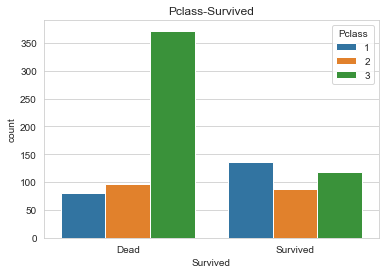

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Pclass", data = train)
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Pclass-Survived')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


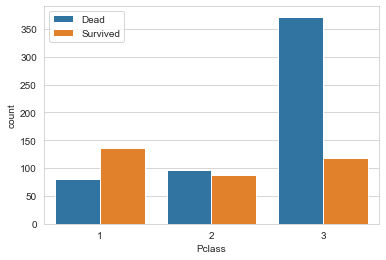

In [ ]:
ax = sns.countplot("Pclass", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper left')

- Pclass가 낮을 수록 사망률이 높았다.


> **1.1.2. Sex & Survived**

In [ ]:
# Sex와 생존률survive의 관계
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

Text(0.5, 1.0, 'Pclass-Survived')

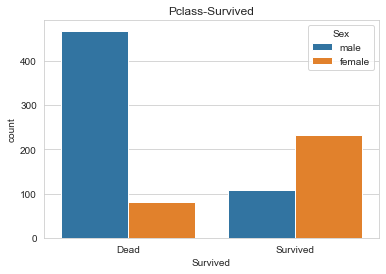

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Sex", data = train)
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Pclass-Survived')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


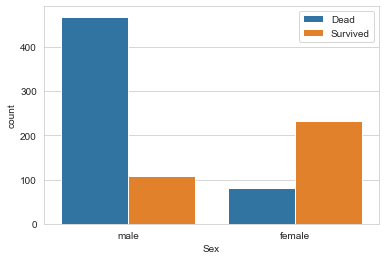

In [ ]:
ax = sns.countplot("Sex", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


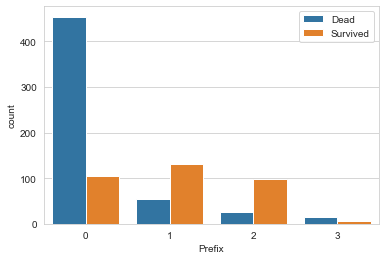

In [ ]:
ax = sns.countplot("Prefix", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')

- 0(Mr): 남성은 생존자보다 사망자가 많다.
- 1(Mrs), 2(Miss): 여성은 사망자보다 생존자가 더 많다. 비율상 기혼자의 생존률이 높아 보인다.
- 3(나머지): 미미하지만 사망자가 더 많다.

- 여성이 남성보다 생존률이 높다.

> **1.1.3. SibSp & Survived**

In [ ]:
# SibSp과 생존률survive의 관계
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

Text(0.5, 1.0, 'SibSp-Survived')

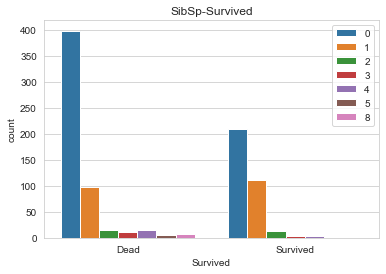

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "SibSp", data = train)
plt.legend(loc = 'upper right')
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('SibSp-Survived')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


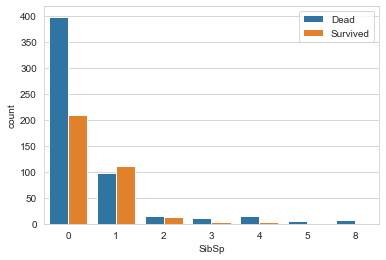

In [ ]:
ax = sns.countplot("SibSp", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')

- 배우자나 형제-자매가 1명 혹은 2명인 경우의 생존률이 비교적 높았다.


> **1.1.4. Parch & Survived**

In [ ]:
# Parch와 생존률survive의 관계
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

Text(0.5, 1.0, 'Parch-Survived')

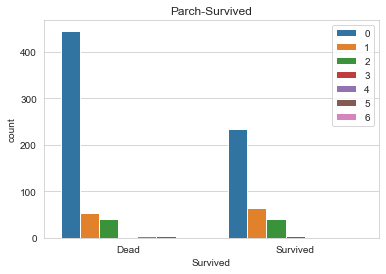

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Parch", data = train)
plt.legend(loc = 'upper right')
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Parch-Survived')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


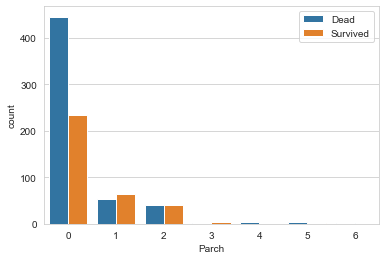

In [ ]:
ax = sns.countplot("Parch", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')

- 혼자인 경우가 많아 사망자와 생존자 모두 많았다.
- 부모 혹은 자식이 3명인 경우의 생존률이 가장 높았고, 1명 혹은 2명인 경우 절반 이상 생존했다.

> **1.1.5. Family & Survived**

In [ ]:
# 가족 수를 합쳐 새로운 칼럼 Family 생성.
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']
train['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [ ]:
# Family와 생존률survive의 관계
train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Family  Survived
3       3  0.724138
2       2  0.578431
1       1  0.552795
6       6  0.333333
0       0  0.303538
4       4  0.200000
5       5  0.136364
7       7  0.000000
8      10  0.000000

Text(0.5, 1.0, 'Family-Survived')

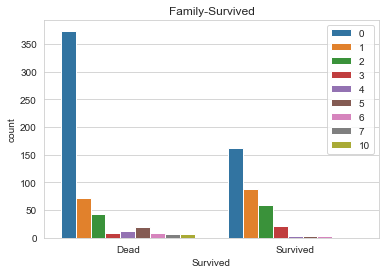

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Family", data = train)
plt.legend(loc = 'upper right')
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Family-Survived')

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


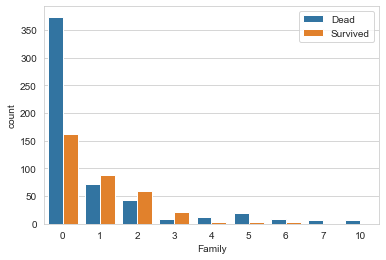

In [ ]:
ax = sns.countplot("Family", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')

- 가족이 1~3명인 경우 사망자보다 생존자가 더 많았다
- 가족 없이 혼자 탑승한 경우 탑승자가 워낙 많기 때문에 사망자와 생존자 모두 많았다.

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda3\envs\python3

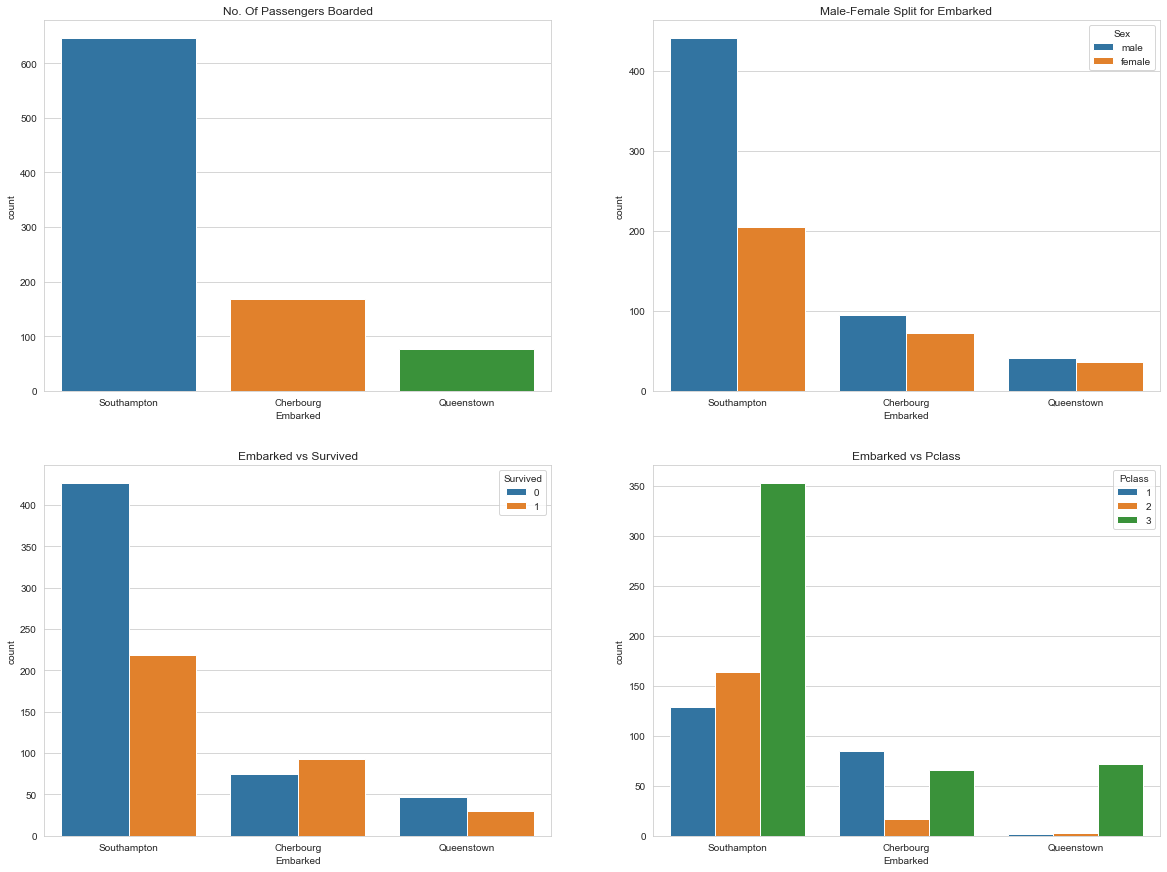

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=train,ax=ax[0,0])

ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,0].set_xticklabels(["Southampton","Cherbourg","Queenstown"])

ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[0,1].set_xticklabels(["Southampton","Cherbourg","Queenstown"])

ax[1,0].set_title('Embarked vs Survived')
ax[1,0].set_xticklabels(["Southampton","Cherbourg","Queenstown"])
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])

ax[1,1].set_title('Embarked vs Pclass')
ax[1,1].set_xticklabels(["Southampton","Cherbourg","Queenstown"])
plt.show()

- 절반 이상의 승객이 ‘Southampton’에서 탑승하고, 승객의 70%가 남성
- Cherbourg에서 탑승한 승객들은 1등 객실 승객의 비중, 생존률이 높음 -> 

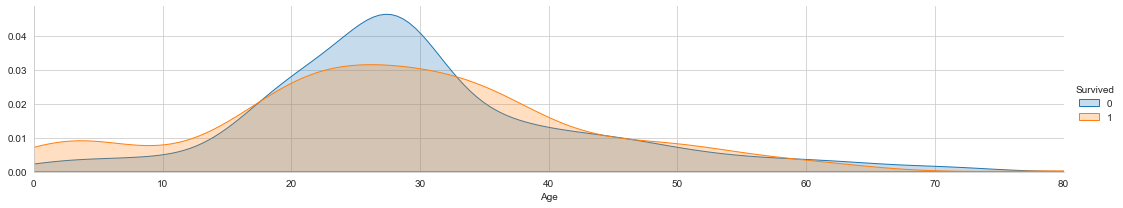

In [ ]:
fac = sns.FacetGrid(train, hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()

In [ ]:
# train["Fare"] = train["Fare"].astype(int)
# test["Fare"] = test["Fare"].astype(int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
 12  Prefix       891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 87.1+ KB


In [ ]:
dummy = pd.get_dummies(train["Sex"])
train["Sex"] = dummy["female"]

In [ ]:
dummy2 = pd.get_dummies(test["Sex"])
test["Sex"] = dummy2["female"]
test["Sex"]

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: uint8

In [ ]:
# emb_dummies_tr = pd.get_dummies(train["Embarked"])
# train["Q"] = emb_dummies_tr["Q"]
# train["S"] = emb_dummies_tr["S"]
# train.drop(columns="Embarked",inplace = True)

In [ ]:
# emb_dummies_ts = pd.get_dummies(test["Embarked"])
# test["Q"] = emb_dummies_ts["Q"]
# test["S"] = emb_dummies_ts["S"]
# test.drop(columns="Embarked",inplace = True)

In [ ]:
train.drop(columns = "PassengerId", inplace = True)
test.drop(columns = "PassengerId", inplace = True)


In [ ]:
train.drop(columns = "Ticket", inplace = True)
test.drop(columns = "Ticket", inplace = True)

In [ ]:
# train["Cabin"] = train["Cabin_order"]
# test["Cabin"] = test["Cabin_order"]

# train.drop(columns = "Cabin_order", inplace = True)
# test.drop(columns = "Cabin_order", inplace = True)

In [ ]:
train["Cabin"]

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: Cabin, Length: 891, dtype: object

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

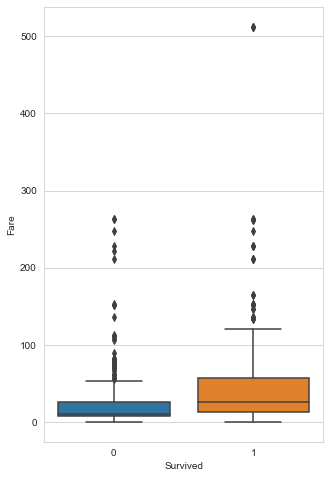

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(x="Survived",y="Fare",data=train)


In [ ]:
fare_first = train["Fare"][train["Pclass"]==1].mean()
fare_second = train["Fare"][train["Pclass"]==2].mean()
fare_third = train["Fare"][train["Pclass"]==3].mean()
print("Average Fare for First class Passenger : ",fare_first)
print("Average Fare for Second class Passenger : ",fare_second)
print("Average Fare for Third class Passenger : ",fare_third)

Average Fare for First class Passenger :  84.1546875
Average Fare for Second class Passenger :  20.662183152173913
Average Fare for Third class Passenger :  13.675550101832993


c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

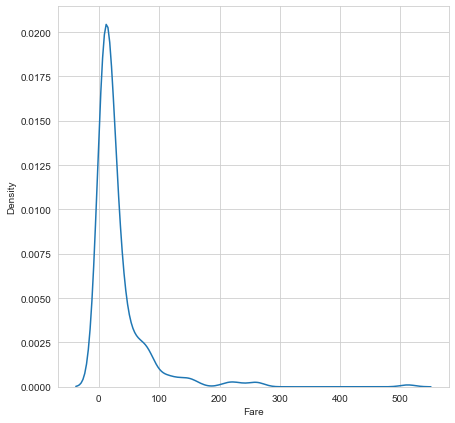

In [ ]:
#Fare데이터 분포 확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Fare"],  hist=False)

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

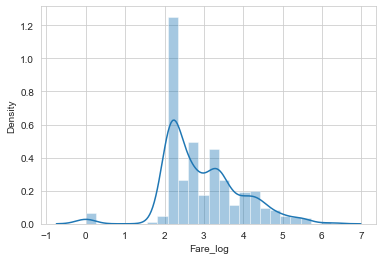

In [ ]:
#Fare 로그처리 -> 정규분포로 바꿔주기
train["Fare_log"] =  np.log(train["Fare"] + 1)

#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Fare_log"])

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

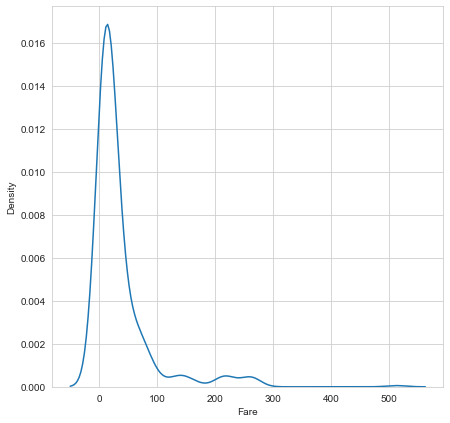

In [ ]:
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(test["Fare"],  hist=False)


c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

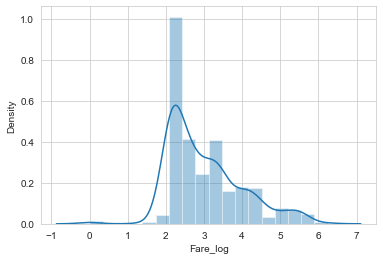

In [ ]:
test["Fare_log"] =  np.log(test["Fare"] + 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(test["Fare_log"])

In [ ]:
test["Fare"] = test["Fare"].fillna(0)

for i in range(418):
    if(test.at[i,"Fare"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Fare"]=fare_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Fare"]=fare_second
        else:
            test.at[i,"Fare"]=fare_third

(0.0, 100.0)

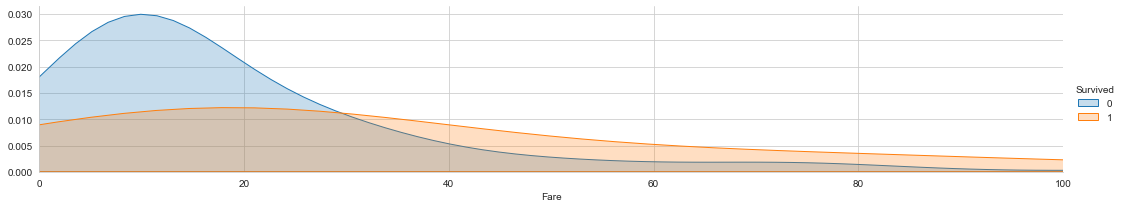

In [ ]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Fare',shade=True)
fac.set(xlim=(0,train["Fare"].max()))
fac.add_legend()
plt.xlim(0,100)

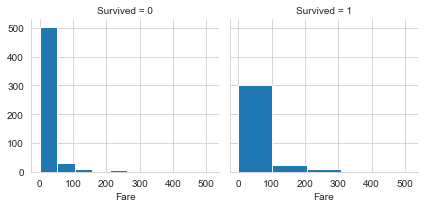

In [ ]:
# Fare요금과 Survived의 관계1
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=5)

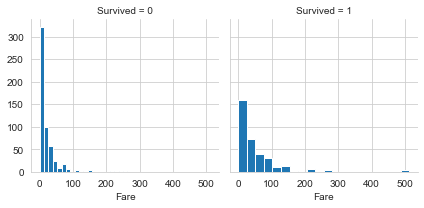

In [ ]:
# Fare요금과 Survived의 관계2
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

### Family: SipSp + Parch

<AxesSubplot:xlabel='Survived', ylabel='count'>

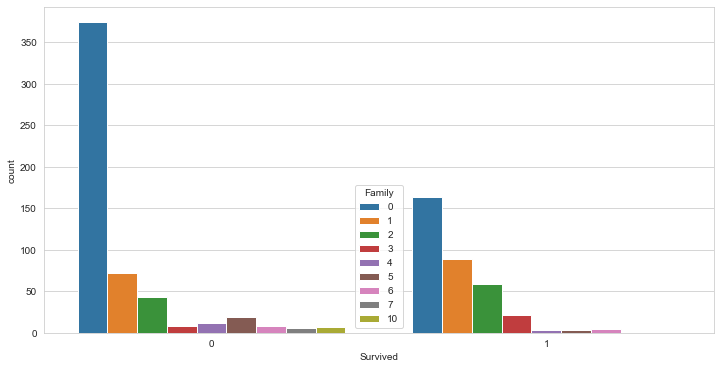

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Family", data = train)


> **1.1.7. Embarked & Survived**

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


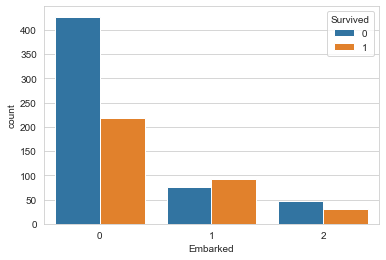

In [ ]:
# Embarked승선지와 survived의 관계
ax = sns.countplot("Embarked", hue='Survived', data=train)

- S(Southhampton): 영국의 사우스햄튼에서 탑승한 사람들의 사망률이 높다.
- C(Cherbourg): 프랑스의 셰르부르에서 탐승한 사람은 많지 않으며 생존률이 더 높다.
- Q(Queenstown): 아일랜드의 퀸스타운.

- 타이타닉호는 1912년 4월 14일 사우스햄튼-셸부르-퀸즈타운을 거쳐 미국의 뉴욕으로 향했다.
- 1912년은 1차 세계대전이 발발하기 2년 전으로, 1871년 보불전쟁, 1878년 오스트리아-헝가리 제국의 보스니아 헤르체고비나 점령으로 인한 긴장이 팽팽했던 시기다. 이에 따라 유럽의 많은 사람들이 유럽을 떠나 미국으로 이민갔다.
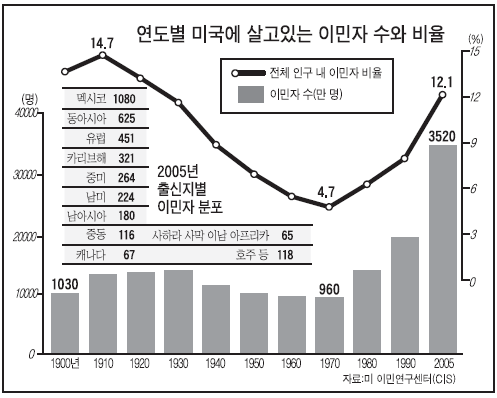
출처: https://news.joins.com/article/1765712?cloc=joongang|marticle|footer
- 항해를 시작할 때 사우스햄튼에서 탑승한 사람들의 사망률이 높았다. 여기에는 선원이 포함되어 있고, 셸부르와 퀸즈타운은 선원이 없을 것으로 추정된다.
- 이 가정이 맞다면 앞서 요금이 0에 가까운 사람들의 사망률이 높은 것도 선원이기 때문으로 추측된다.


c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


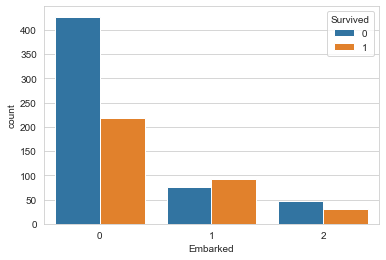

In [ ]:
# Embarked승선지와 survived의 관계
ax = sns.countplot("Embarked", hue='Survived', data=train)

- S(Southhampton): 영국의 사우스햄튼에서 탑승한 사람들의 사망률이 높다.
- C(Cherbourg): 프랑스의 셰르부르에서 탐승한 사람은 많지 않으며 생존률이 더 높다.
- Q(Queenstown): 아일랜드의 퀸스타운.

- 타이타닉호는 1912년 4월 14일 사우스햄튼-셸부르-퀸즈타운을 거쳐 미국의 뉴욕으로 향했다.
- 1912년은 1차 세계대전이 발발하기 2년 전으로, 1871년 보불전쟁, 1878년 오스트리아-헝가리 제국의 보스니아 헤르체고비나 점령으로 인한 긴장이 팽팽했던 시기다. 이에 따라 유럽의 많은 사람들이 유럽을 떠나 미국으로 이민갔다.
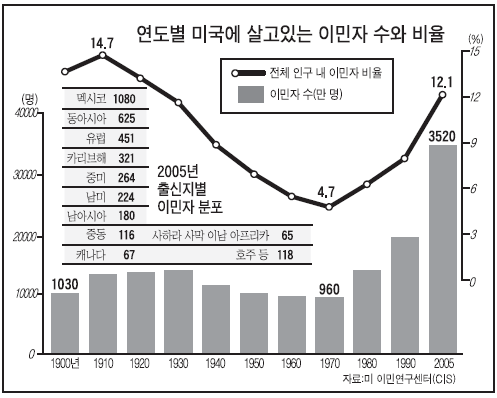
출처: https://news.joins.com/article/1765712?cloc=joongang|marticle|footer
- 항해를 시작할 때 사우스햄튼에서 탑승한 사람들의 사망률이 높았다. 여기에는 선원이 포함되어 있고, 셸부르와 퀸즈타운은 선원이 없을 것으로 추정된다.
- 이 가정이 맞다면 앞서 요금이 0에 가까운 사람들의 사망률이 높은 것도 선원이기 때문으로 추측된다.


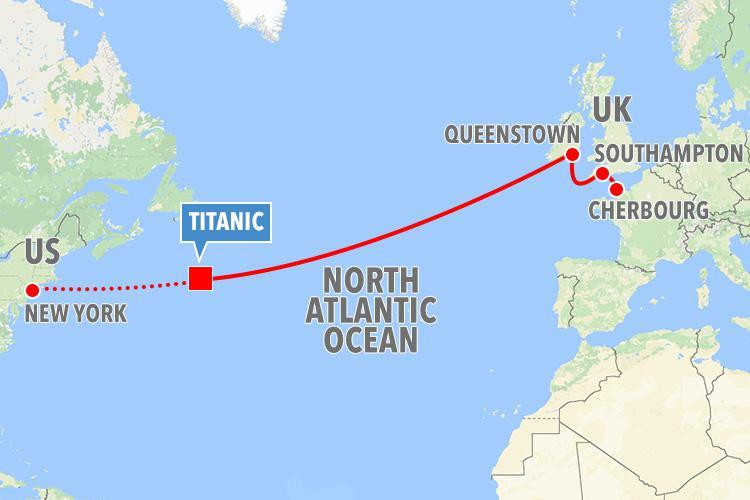
출처: https://www.thesun.ie/news/5091958/titanic-expert-claims-that-ship-was-on-fire-for-days-before-it-hit-iceberg-during-doomed-maiden-voyage/

### 1.2. 수치형 변수와 survived관계


> **1.2.1. Age & Survived**

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

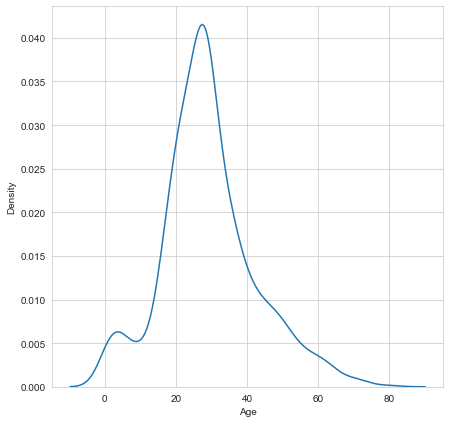

In [ ]:
#Age데이터 분포확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Age"],  hist=False)

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_log', ylabel='Density'>

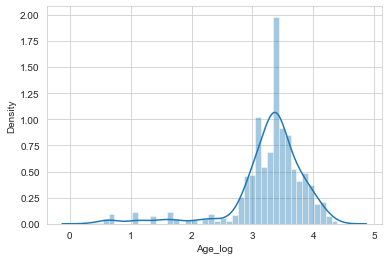

In [ ]:
#Age 로그처리-> 정규분포로 바꿔주기
train["Age_log"] =  np.log(train["Age"]+ 1)
test["Age_log"] =  np.log(test["Age"]+ 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Age_log"])

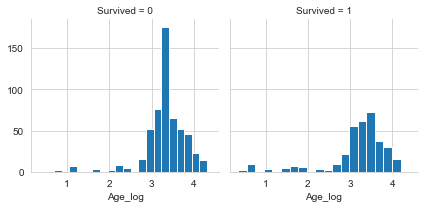

In [ ]:
# Age연령과 survived의 관계
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age_log', bins=20)

- 0(notsurvived): 0대, 10대의 생존률이 높다, 20~40대의 생존률이 낮다. 60대 이상의 생존률은 높다.
- 1(survived): 0대의 생존률이 높지만 10대의 생존률은 낮다. 60대 이상의 생존률이 낮다.



> **1.2.2. Fare & Survived**

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

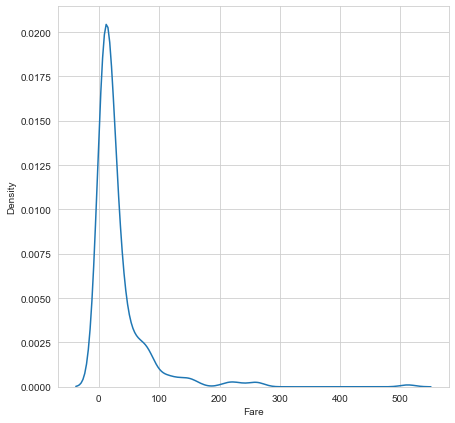

In [ ]:
#Fare데이터 분포 확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Fare"],  hist=False)

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

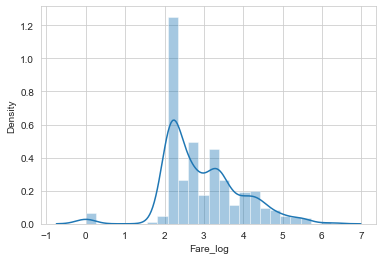

In [ ]:
#Fare 로그처리 -> 정규분포로 바꿔주기
train["Fare_log"] =  np.log(train["Fare"] + 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Fare_log"])

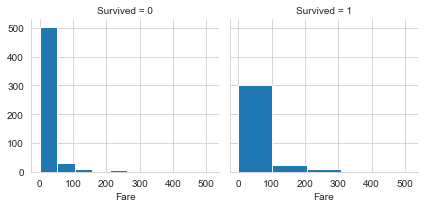

In [ ]:
# Fare요금과 Survived의 관계1
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=5)

- 요금Fare이 낮은 경우 사망률이 높지만, 전체적으로 많은 사람들이 낮은 요금을 사용했기 때문에 생존률도 제일 높다.

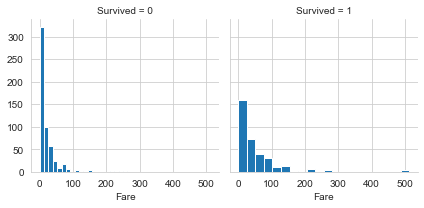

In [ ]:
# Fare요금과 Survived의 관계2
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

- 낮은 요금을 낼 수록 사망률이 높지만, 사람이 많은 만큼 생존률도 높은 경향을 보인다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    uint8  
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Fare          891 non-null    float64
 8   Cabin         891 non-null    object 
 9   Embarked      891 non-null    int32  
 10  Prefix        891 non-null    int64  
 11  Family        891 non-null    int64  
 12  Age_log       891 non-null    float64
 13  Fare_log      891 non-null    float64
 14  Age_dgt       891 non-null    int64  
 15  Fare_dgt      891 non-null    int64  
 16  Family_dgt    891 non-null    int64  
 17  Fare_log_dgt  891 non-null    int64  
 18  Cabin_score   891 non-null    

### 1.3. 두가지 이상의 변수와 생존률Survived의 관계


> **1.3.1. Sex, Pclass & Survived**

In [ ]:
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass         1         2         3
Sex                                 
0       0.368852  0.157407  0.135447
1       0.968085  0.921053  0.500000

- 여성: 1, 2 등급 객실의 여성은 각각 96%, 92% 생존했고, 3등급 객실의 여성도 50% 생존
- 남성: 1등급 객실의 남성이 36% 생존하고 2, 3 등급 객실의 남성은 15%이하로 생존

In [ ]:
# 10년씩 구분
bins = [10, 20, 30, 40, 50, 60, 70]
train['Age_dgt'] = np.digitize(train['Age'], bins)
train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Cabin  Embarked  Prefix  Family   Age_log  \
0  22.0      1      0   7.2500     F         0       0       1  3.135494   
1  38.0      1      0  71.2833     C         1       2       1  3.663562   
2  26.0      0      0   7.9250     F         0       1       0  3.295837   
3  35.0      1      0  53.1000     C         0       2       1  3.583519   
4  35.0      0      0   8.0500     F         0       0       0  3.583519   

   Fare_log  Age_dgt  Fare_dgt  Family_dgt  Fare_log_dgt  Cabin_score  
0  2.110213        2         2           2             3           24  
1  4.280593        3         4           2             5           40  
2  2.188856        2         2           1             3           24  
3  3.990834        3         3           2             4           40  
4  2.202765        3         2           1             3           24


> **1.3.2. Sex, Age_dgt & Survived**

In [ ]:
train.pivot_table('Survived', index='Sex', columns='Age_dgt')

Age_dgt         0         1         2         3         4         5         6  \
Sex                                                                             
0        0.593750  0.122807  0.151292  0.214953  0.206897  0.133333  0.133333   
1        0.633333  0.755556  0.685185  0.831169  0.687500  0.888889  1.000000   

Age_dgt         7  
Sex                
0        0.142857  
1             NaN

- 60대 여성, 50대 여성, 30대 여성, 10대 여성, 40대 여성, 20대 여성, 10세 미만 여성, 10세 미만 남성 순으로 생존률이 높았으며, 10대 이상 남성의 생존률은 21%를 넘지 못했다.


> **1.3.3. Sex, Fare & Survived**

In [ ]:
train.pivot_table('Survived', index='Sex', columns='Fare')

Fare  0.0000    4.0125    5.0000    6.2375    6.4375    6.4500    6.4958    \
Sex                                                                          
0     0.066667       0.0       0.0       0.0       0.0       0.0       0.0   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

Fare  6.7500    6.8583    6.9500    ...  153.4625  164.8667  211.3375  \
Sex                                 ...                                 
0          0.0       0.0       0.0  ...       0.0       NaN       NaN   
1          0.0       NaN       NaN  ...       1.0       1.0       1.0   

Fare  211.5000  221.7792  227.5250  247.5208  262.3750  263.0000  512.3292  
Sex                                                                         
0          0.0       0.0       0.0       0.0       NaN       0.0       1.0  
1          NaN       NaN       1.0       1.0       1.0       1.0       1.0  

[2 rows x 248 columns]

In [ ]:
# Fare_log로 구분
bins = [1, 2, 3, 4, 5, 6, 7]
train['Fare_dgt'] = np.digitize(train['Fare_log'], bins)
train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Cabin  Embarked  Prefix  Family   Age_log  \
0  22.0      1      0   7.2500     F         0       0       1  3.135494   
1  38.0      1      0  71.2833     C         1       2       1  3.663562   
2  26.0      0      0   7.9250     F         0       1       0  3.295837   
3  35.0      1      0  53.1000     C         0       2       1  3.583519   
4  35.0      0      0   8.0500     F         0       0       0  3.583519   

   Fare_log  Age_dgt  Fare_dgt  Family_dgt  Fare_log_dgt  Cabin_score  
0  2.110213        2         2           2             3           24  
1  4.280593        3         4           2             5           40  
2  2.188856        2         2           1             3           24  
3  3.990834        3         3           2             4           40  
4  2.202765        3         2           1             3           24

In [ ]:
train.pivot_table('Survived', index='Sex', columns='Fare_dgt')

Fare_dgt         0    1         2         3         4         5    6
Sex                                                                 
0         0.066667  0.0  0.133144  0.262069  0.392157  0.125000  1.0
1              NaN  NaN  0.654412  0.704082  0.950820  0.888889  1.0

- 성별을 불문하고 돈을 많이 낸 사람들은 모두 살아남았다
- 여성의 경우 Fare가 높을 수록 생존률survived가 높은 경향을 보인다.
- 남성의 경우 Fare_log가 4에 해당하는 경우의 생존률이 39%로 다른 경우보다 높았다.


> **1.3.4. Age_dgt, Fare_dgt & Survived**

In [ ]:
train.pivot_table('Survived', index='Age_dgt', columns='Fare_dgt')

Fare_dgt         0    1         2         3         4         5    6
Age_dgt                                                             
0              NaN  NaN  0.875000  0.511628  1.000000  0.500000  NaN
1         0.000000  NaN  0.328125  0.363636  0.818182  0.750000  NaN
2         0.111111  0.0  0.246154  0.430769  0.500000  0.500000  NaN
3         0.000000  0.0  0.277778  0.509804  0.939394  0.666667  1.0
4         0.000000  NaN  0.200000  0.416667  0.615385  1.000000  NaN
5              NaN  NaN  0.176471  0.466667  0.571429  1.000000  NaN
6              NaN  0.0  0.500000  0.000000  0.800000  0.000000  NaN
7              NaN  NaN  0.000000  0.333333  0.000000       NaN  NaN


> **1.3.5. Pclass, Fare_dgt & Survived**

In [ ]:
train.pivot_table('Survived', index='Pclass', columns='Fare_dgt')

Fare_dgt     0    1         2         3         4         5    6
Pclass                                                          
1         0.00  0.0       NaN  0.500000  0.780220  0.653846  1.0
2         0.00  NaN  0.416667  0.600000  0.285714       NaN  NaN
3         0.25  0.0  0.244275  0.217949  0.357143       NaN  NaN

Age_dgt, Fare_dgt 그리고 Pclass, Fare_dgt와 Survived의 관계를 조사한 결과 뚜렷한 경향성을 파악할 수 없었다.


> **1.3.6. Family_dgt, Age_dgt & Survived**

In [ ]:
# Family를 0명, 1명 3명 이상으로 구분
# 1: 본인 혼자
# 2: 배우자, 자식, 혹은 부모 중 1인
# 3: 본인을 포함한 가족구성원 >=3
bins = [0, 1, 2]
train['Family_dgt'] = np.digitize(train['Family'], bins)
test['Family_dgt'] = np.digitize(test['Family'], bins)

train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Cabin  Embarked  Prefix  Family   Age_log  \
0  22.0      1      0   7.2500     F         0       0       1  3.135494   
1  38.0      1      0  71.2833     C         1       2       1  3.663562   
2  26.0      0      0   7.9250     F         0       1       0  3.295837   
3  35.0      1      0  53.1000     C         0       2       1  3.583519   
4  35.0      0      0   8.0500     F         0       0       0  3.583519   

   Fare_log  Age_dgt  Fare_dgt  Family_dgt  Fare_log_dgt  Cabin_score  
0  2.110213        2         2           2             3           24  
1  4.280593        3         4           2             5           40  
2  2.188856        2         2           1             3           24  
3  3.990834        3         3           2             4           40  
4  2.202765        3         2           1             3           24

In [ ]:
train.pivot_table('Survived', index='Family_dgt', columns='Age_dgt')

Age_dgt            0         1         2         3         4         5  \
Family_dgt                                                               
1           1.000000  0.320755  0.264493  0.394495  0.340000  0.275862   
2           0.833333  0.695652  0.403846  0.619048  0.500000  0.615385   
3           0.581818  0.307692  0.411765  0.545455  0.333333  0.666667   

Age_dgt            6         7  
Family_dgt                      
1           0.230769  0.166667  
2           0.666667       NaN  
3           0.333333  0.000000

- 가족 없이 혼자 탑승한 사람들은 유아를 제외하고 35%이하의 생존률을 보였다
- 2인 가족의 경우 유아와 10대의 생존률이 각각 835, 69%로 높지만 20, 30, 40대에서 53%이하의 생존률을 보이고 50, 60대에서 다시 60% 이상의 생존률을 기록했다.
- 3인 이상 가족의 경우 유아와 50대의 생존률이 높았지만 60대 이상의 생존률이 낮았다. 또, 10대부터 40대까지 30~40%의 낮은 생존률을 기록했다.


> **1.3.7. Parch, Age_dgt & Survived**

In [ ]:
train.pivot_table('Survived', index='Age_dgt', columns='Parch')

Parch           0         1         2    3    4     5    6
Age_dgt                                                   
0        1.000000  0.657143  0.538462  NaN  NaN   NaN  NaN
1        0.380282  0.400000  0.533333  0.0  NaN   NaN  NaN
2        0.279635  0.500000  0.400000  1.0  0.0   NaN  NaN
3        0.453333  0.550000  0.700000  NaN  NaN  0.25  NaN
4        0.367647  0.571429  0.333333  0.0  0.0  0.00  0.0
5        0.368421  0.625000  0.000000  1.0  NaN   NaN  NaN
6        0.333333  0.333333       NaN  NaN  0.0   NaN  NaN
7        0.166667  0.000000       NaN  NaN  NaN   NaN  NaN

- 유아와 10대의 경우 부모가 없는 경우보다 있는 경우에 생존률이 높은 경향을 보였다.


> **1.3.8. Sex, Parch, Age_dgt & Survived**

In [ ]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Parch')

Parch               0         1         2    3    4         5    6
Sex Age_dgt                                                       
0   0             NaN  0.600000  0.583333  NaN  NaN       NaN  NaN
    1        0.119048  0.000000  0.333333  0.0  NaN       NaN  NaN
    2        0.145669  0.444444  0.000000  NaN  NaN       NaN  NaN
    3        0.212766  0.222222  0.333333  NaN  NaN  0.000000  NaN
    4        0.235294  0.000000  0.000000  NaN  0.0       NaN  NaN
    5        0.153846  0.000000  0.000000  NaN  NaN       NaN  NaN
    6        0.090909  0.333333       NaN  NaN  0.0       NaN  NaN
    7        0.166667  0.000000       NaN  NaN  NaN       NaN  NaN
1   0        1.000000  0.733333  0.500000  NaN  NaN       NaN  NaN
    1        0.758621  0.857143  0.666667  NaN  NaN       NaN  NaN
    2        0.733333  0.538462  0.588235  1.0  0.0       NaN  NaN
    3        0.857143  0.818182  0.857143  NaN  NaN  0.333333  NaN
    4        0.764706  0.888889  0.500000  0.0  0.0  0.000000  0.0
    5        0.833333  1.000000       NaN  1.0  NaN       NaN  NaN
    6        1.000000       NaN       NaN  NaN  NaN       NaN  NaN

- 부모가 없는 유아 여성은 모두 생존했고, 오히려 부모가 있는 유아 여성의 생존률이 낮았다. 
- 반대로 유아 남성의 경우 부모가 존재하는 경우의 생존률이 높았다.


> **1.3.9. Sex, SibSp, Age_dgt & Survived**

In [ ]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='SibSp')

SibSp               0         1      2    3     4    5    8
Sex Age_dgt                                                
0   0        1.000000  1.000000  1.000  0.0  0.10  0.0  NaN
    1        0.135135  0.153846  0.000  0.0  0.00  0.0  NaN
    2        0.142222  0.242424  0.125  0.0   NaN  NaN  0.0
    3        0.222222  0.208333  0.000  NaN   NaN  NaN  NaN
    4        0.166667  0.357143  0.000  NaN   NaN  NaN  NaN
    5        0.120000  0.000000  1.000  NaN   NaN  NaN  NaN
    6        0.083333  0.333333    NaN  NaN   NaN  NaN  NaN
    7        0.166667  0.000000    NaN  NaN   NaN  NaN  NaN
1   0        0.888889  0.750000  0.800  0.0  0.25  NaN  NaN
    1        0.785714  0.833333  0.500  NaN  0.50  0.0  NaN
    2        0.761194  0.607143  0.800  0.4   NaN  NaN  0.0
    3        0.800000  0.857143    NaN  1.0   NaN  NaN  NaN
    4        0.764706  0.600000    NaN  NaN   NaN  NaN  NaN
    5        0.818182  1.000000  1.000  NaN   NaN  NaN  NaN
    6        1.000000  1.000000    NaN  NaN   NaN  NaN  NaN


> **1.3.10. Sex, Embarked, Age_dgt & Survived**

In [ ]:
train.pivot_table('Survived', index=['Sex'], columns='Embarked')

Embarked         0         1         2
Sex                                   
0         0.174603  0.305263  0.073171
1         0.692683  0.876712  0.750000

In [ ]:
train.pivot_table('Survived', index=['Age_dgt'], columns='Embarked')

Embarked         0         1         2
Age_dgt                               
0         0.612245  0.888889  0.000000
1         0.315789  0.650000  0.666667
2         0.238462  0.454545  0.433962
3         0.446043  0.594595  0.375000
4         0.333333  0.611111  0.000000
5         0.382353  0.538462  0.000000
6         0.266667  0.666667  0.000000
7         0.250000  0.000000  0.000000

In [ ]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Embarked')

Embarked            0         1         2
Sex Age_dgt                              
0   0        0.653846  1.000000  0.000000
    1        0.100000  0.333333  0.000000
    2        0.119171  0.300000  0.107143
    3        0.215909  0.235294  0.000000
    4        0.177778  0.400000  0.000000
    5        0.130435  0.166667  0.000000
    6        0.083333  0.500000  0.000000
    7        0.250000  0.000000  0.000000
1   0        0.565217  0.857143       NaN
    1        0.730769  0.785714  0.800000
    2        0.582090  0.937500  0.800000
    3        0.843137  0.900000  0.500000
    4        0.625000  0.875000       NaN
    5        0.909091  0.857143       NaN
    6        1.000000  1.000000       NaN


> **1.3.11. Sex, Title, Age_dgt & Survived**

In [ ]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Prefix')

Prefix              0         1         2         3
Sex Age_dgt                                        
0   0        0.593750       NaN       NaN       NaN
    1        0.122807       NaN       NaN       NaN
    2        0.152985       NaN       NaN  0.000000
    3        0.209524       NaN       NaN  0.500000
    4        0.226415       NaN       NaN  0.000000
    5        0.043478       NaN       NaN  0.428571
    6        0.142857       NaN       NaN  0.000000
    7        0.142857       NaN       NaN       NaN
1   0             NaN  0.633333       NaN       NaN
    1             NaN  0.722222  0.888889       NaN
    2             NaN  0.658228  0.750000  1.000000
    3             NaN  0.821429  0.833333  1.000000
    4             NaN  0.833333  0.640000  1.000000
    5             NaN  0.833333  0.916667       NaN
    6             NaN  1.000000  1.000000       NaN

In [ ]:
train.pivot_table('Survived', index=['Prefix','Age_dgt'], columns='SibSp')
# "Mr":0, "Mrs":1, "Miss":2, Other:3

SibSp                  0         1         2    3     4    5    8
Prefix Age_dgt                                                   
0      0        1.000000  1.000000  1.000000  0.0  0.10  0.0  NaN
       1        0.135135  0.153846  0.000000  0.0  0.00  0.0  NaN
       2        0.144144  0.242424  0.125000  0.0   NaN  NaN  0.0
       3        0.215190  0.208333  0.000000  NaN   NaN  NaN  NaN
       4        0.184211  0.357143  0.000000  NaN   NaN  NaN  NaN
       5        0.050000  0.000000       NaN  NaN   NaN  NaN  NaN
       6        0.090909  0.333333       NaN  NaN   NaN  NaN  NaN
       7        0.166667  0.000000       NaN  NaN   NaN  NaN  NaN
1      0        0.888889  0.750000  0.800000  0.0  0.25  NaN  NaN
       1        0.777778  0.750000  0.500000  NaN  0.50  0.0  NaN
       2        0.727273  0.615385  0.666667  0.4   NaN  NaN  0.0
       3        0.800000  1.000000       NaN  NaN   NaN  NaN  NaN
       4        0.800000  1.000000       NaN  NaN   NaN  NaN  NaN
       5        0.800000  1.000000       NaN  NaN   NaN  NaN  NaN
       6             NaN  1.000000       NaN  NaN   NaN  NaN  NaN
2      1        1.000000  0.875000       NaN  NaN   NaN  NaN  NaN
       2        0.909091  0.600000  1.000000  NaN   NaN  NaN  NaN
       3        0.785714  0.843750       NaN  1.0   NaN  NaN  NaN
       4        0.727273  0.571429       NaN  NaN   NaN  NaN  NaN
       5        0.833333  1.000000  1.000000  NaN   NaN  NaN  NaN
       6        1.000000  1.000000       NaN  NaN   NaN  NaN  NaN
3      2        0.250000       NaN       NaN  NaN   NaN  NaN  NaN
       3        0.666667       NaN       NaN  NaN   NaN  NaN  NaN
       4        0.200000       NaN  0.000000  NaN   NaN  NaN  NaN
       5        0.400000  0.000000  1.000000  NaN   NaN  NaN  NaN
       6        0.000000       NaN       NaN  NaN   NaN  NaN  NaN


> **1.3.12. Fare, Pclass & Survived**

In [ ]:
# Fare_log를 1~7로 구분
# 클 수록 많은 Fare를 지출

bins = [0, 1, 2, 3, 4, 5, 6, 7]
train['Fare_log_dgt'] = np.digitize(train['Fare_log'], bins)
train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Cabin  Embarked  Prefix  Family   Age_log  \
0  22.0      1      0   7.2500     F         0       0       1  3.135494   
1  38.0      1      0  71.2833     C         1       2       1  3.663562   
2  26.0      0      0   7.9250     F         0       1       0  3.295837   
3  35.0      1      0  53.1000     C         0       2       1  3.583519   
4  35.0      0      0   8.0500     F         0       0       0  3.583519   

   Fare_log  Age_dgt  Fare_dgt  Family_dgt  Fare_log_dgt  Cabin_score  
0  2.110213        2         2           2             3           24  
1  4.280593        3         4           2             5           40  
2  2.188856        2         2           1             3           24  
3  3.990834        3         3           2             4           40  
4  2.202765        3         2           1             3           24

In [ ]:
train.pivot_table('Survived', index='Pclass', columns='Fare_log')

Fare_log  0.000000  1.611935  1.791759  1.979276  2.006535  2.008214  \
Pclass                                                                 
1             0.00       NaN       0.0       NaN       NaN       NaN   
2             0.00       NaN       NaN       NaN       NaN       NaN   
3             0.25       0.0       NaN       0.0       0.0       0.0   

Fare_log  2.014343  2.047693  2.061570  2.073172  ...  5.039951  5.111184  \
Pclass                                            ...                       
1              NaN       NaN       NaN       NaN  ...  0.666667       1.0   
2              NaN       NaN       NaN       NaN  ...       NaN       NaN   
3              0.0       0.0       0.0       0.0  ...       NaN       NaN   

Fare_log  5.358177  5.358942  5.406181  5.431646  5.515527  5.573579  \
Pclass                                                                 
1              1.0       0.0       0.0      0.75       0.5       1.0   
2              NaN       NaN       NaN       NaN       NaN       NaN   
3              NaN       NaN       NaN       NaN       NaN       NaN   

Fare_log  5.575949  6.240917  
Pclass                        
1              0.5       1.0  
2              NaN       NaN  
3              NaN       NaN  

[3 rows x 248 columns]

In [ ]:
# Fare_log_dgt와 생존률survive의 관계
train[['Fare_log_dgt', 'Survived']].groupby(['Fare_log_dgt'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Fare_log_dgt  Survived
6             7  1.000000
4             5  0.696429
5             6  0.653846
3             4  0.440329
2             3  0.278119
0             1  0.066667
1             2  0.000000

In [ ]:
train.pivot_table('Survived', index='Pclass', columns='Fare_log_dgt')

Fare_log_dgt     1    2         3         4         5         6    7
Pclass                                                              
1             0.00  0.0       NaN  0.500000  0.780220  0.653846  1.0
2             0.00  NaN  0.416667  0.600000  0.285714       NaN  NaN
3             0.25  0.0  0.244275  0.217949  0.357143       NaN  NaN

In [ ]:
corr = train[['Fare_log_dgt', 'Pclass']].corr()
print(corr)
# -0.61: 높은 상관관계

              Fare_log_dgt    Pclass
Fare_log_dgt      1.000000 -0.619297
Pclass           -0.619297  1.000000


### 다른 eda

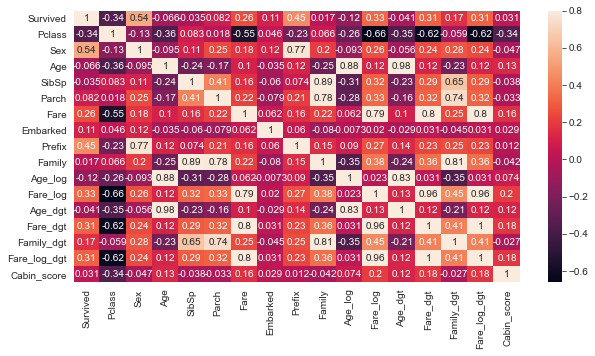

In [ ]:
# 히트맵

correlation_matrix = train.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True) 
plt.show()

# Survived의 상관관계를 보면
# Fare_log가 -0.66으로 높다
# Age 남기고 Age_log, Age_log2, Fare, Fare_log2 삭제

> **Survived와 관계**
1. Sex: 0.54
2. Title: 0.44
3. Pclass: -0.34
4. Fare_log: 0.33

- 컬럼 삭제: 절대값 0.1 미만, 중복되는 값(fare, fare_log 등)

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Prefix', 'Family', 'Age_log', 'Fare_log',
       'Age_dgt', 'Fare_dgt', 'Family_dgt', 'Fare_log_dgt', 'Cabin_score'],
      dtype='object')

In [ ]:
train_df = train[['Survived','Pclass','Sex','Embarked','Prefix','Fare_log','Age_log','Family_dgt']]

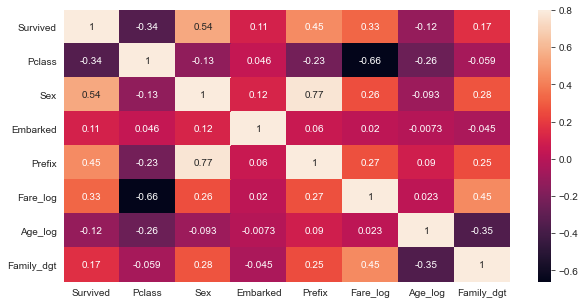

In [ ]:
correlation_matrix = train_df.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True) 
plt.show()

> **Survived와 관계**
1. Sex: 0.54
2. Prefix: 0.45
3. Pclass: -0.34
4. Fare_log: 0.33
5. Family_dgt: 0.2
6. Age_log: -0.12
7. Embarked: 0.11

### 1.4. EDA 정리

- Pclass: 등급이 높을수록 생존률이 높은 경향을 보였다.
- Sex: 여성이 남성보다 생존률이 높은 경향을 보였다.
- Family: 가족이 1~3명인 경우 생존률이 높다.(본인 제외) - 4인가족인 경우 생존률이 가장 높았다.
- Cabin: A, G, C, F, B, E, D 순서로 생존률이 높았다.
- Fare_log_dgt: 7, 5, 6, 4, 3, 1, 2 순서로 생존률이 높았다. (값이 클 수록 많은 Fare를 지출)
- Pclass & Fare_log_dgt: Pclass가 1이면서 많은 Fare를 지출한 사람들이 많이 생존했다. 하지만 Pclass가 2인 경우 많은 Fare를 지출했다고 해서 생존률이 높지는 않았다. Pclass가 3인 경우 미미하게 생존률이 증가하기는 했지만 대체적으로 낮은 생존률을 보였다. 비슷한 요금을 지불했음에도 Pclass별로 생존률이 차이났음을 알 수 있다. 여기서 배의 구조가 생존률에 영향을 끼쳤을 가능성이 있다고 생각되었다.
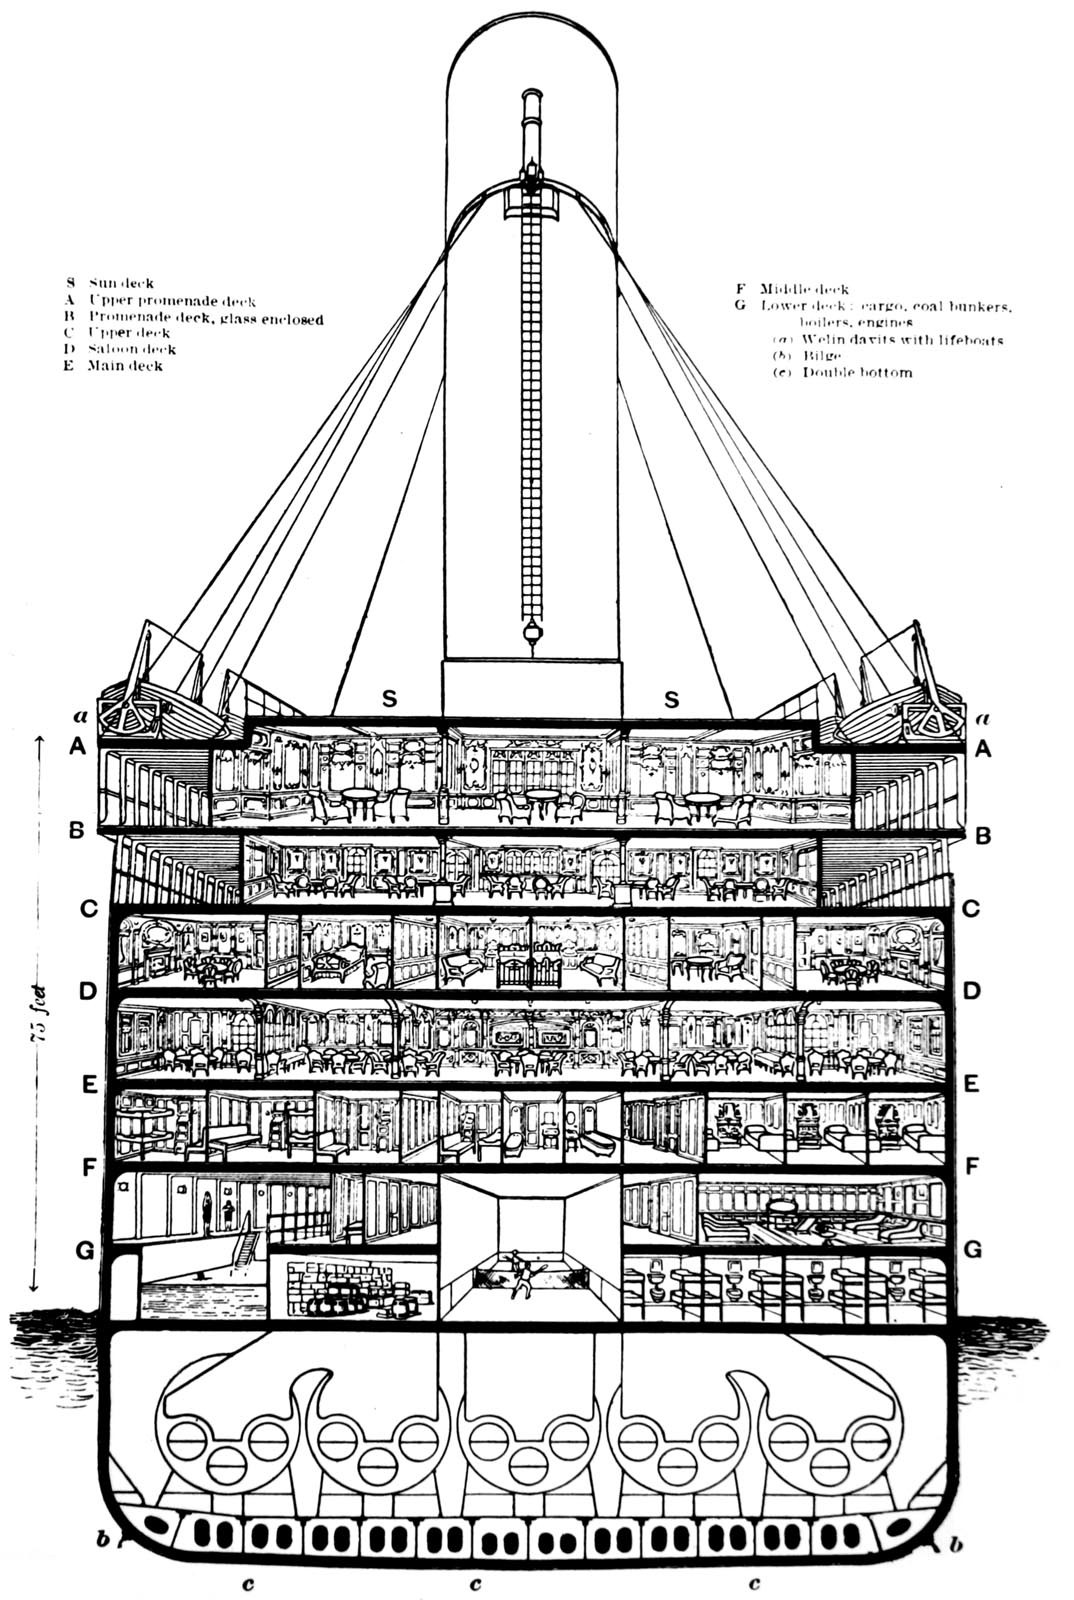
https://www.anatomynote.com/wp-content/uploads/2019/09/15465/Titanic-sectional-structure-diagram.jpg
https://www.anatomynote.com/transportation-anatomy/ship-anatomy/titanic-sectional-structure-diagram/
- 타이타닉호는 알파벳 순서로 갑판과 가장 가깝고, 많은 비용Fare를 지출하는 구조였다. 
    - S(일광욕용 갑판Sun deck)
    - A(상부 산책로 갑판Upper promenade deck): 배를 둘러싼 복도가 외부로 뚫려 있어 산책할 수 있다. 1등실 객실, 라운지, 흡연실, 독서실, 야자수 코트
    - B(선교루 갑판Promenade deck), glass enclosed: 1등급 객실, 레스토랑, 카페, 선미 부분에 3등실 산책로
    - C(상층 갑판Upper deck): 3등실 산책로, 선원 숙소, 3등실 전용 휴게실과 흡연실, 1등실 객실, 2등실 도서관
    - D(살롱 갑판Saloon deck): 1등실 대합실, 1등실 식당, 2등실 식당, 1,2,3등급 객실, 화부 숙소
    - E(메인 갑판Main deck): 1, 2, 3등실 객실 및 선원숙소
    - F(중간 갑판Middle deck): 대부분의 3등실 객실과 2등 객실 및 선원숙소, 3등실 식당, 1등실용 수영장
    - G(하부 갑판Lower deck): 객실이 있는 가장 낮은 갑판, 스쿼시장, 창고, 보일러실, 기관실 등

1. Fare가 높을 수록 Pclass가 낮다(대우도 성립).
2. Fare가 높고, Pclass가 낮을수록 배의 윗부분Cabin에서 주로 생활했다.
3. 다만 fare_log_dgt와 Pclass의 상관관계에서 0.39에 해당하는 사람들은 다른 Pclass와 Cabin 위치가 섞인 경우다.

### 만약 Cabin의 결측치가 적었다면?

- cabin 있는지 여부
- cabin 위치 인코딩

In [ ]:
print(train["Cabin"].isna().value_counts())
print(test["Cabin"].isna().value_counts())

False    891
Name: Cabin, dtype: int64
True     327
False     91
Name: Cabin, dtype: int64


In [ ]:
combined_data = [train,test]

In [ ]:
train["Cabin"].unique()

array(['F', 'C', 'E', 'G', 'D', 'A', 'B', 'T'], dtype=object)

In [ ]:
for data in combined_data:
    data["Cabin"] = data["Cabin"].str.extract('([A-Za-z]+)', expand = False)
    
train.Cabin.head()

0    F
1    C
2    F
3    C
4    F
Name: Cabin, dtype: object

In [ ]:
# for data in combined_data:
#     data["Cabin_order"] = data["Cabin"].str.extract(' ([A-Za-z]+)\.', expand = False)
    
# Cabin_mapping = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
# for data in combined_data:
#     data["Cabin_order"] = data["Cabin_order"].map(Cabin_mapping)

In [ ]:

# Cabin 없는 사람 0 처리

#train["Cabin"] = train["Cabin"].fillna(0)

# for i in range(891):
#     if(train.at[i,"Cabin"]!=0):
# #         if (train.at[i,"Cabin"]=1):

# # A ~ G 객실별 ordinal encoding
# for data in combined_data:
#     data["Cabin_order"] = data["Cabin"].str.extract(' ([A-Za-z]+)\.', expand = False)
    


In [ ]:
cabin_rate = train.groupby(['Cabin','Survived']).count()
    # Title로 사망자 집계
    # 0: 사망
    # 1: 생존
cabin_rate

Pclass  Name  Sex  Age  SibSp  Parch  Fare  Embarked  Prefix  \
Cabin Survived                                                                 
A     0              8     8    8    8      8      8     8         8       8   
      1              7     7    7    7      7      7     7         7       7   
B     0             12    12   12   12     12     12    12        12      12   
      1             35    35   35   35     35     35    35        35      35   
C     0             45    45   45   45     45     45    45        45      45   
      1             54    54   54   54     54     54    54        54      54   
D     0              8     8    8    8      8      8     8         8       8   
      1             25    25   25   25     25     25    25        25      25   
E     0              8     8    8    8      8      8     8         8       8   
      1             24    24   24   24     24     24    24        24      24   
F     0            465   465  465  465    465    465   465       465     465   
      1            195   195  195  195    195    195   195       195     195   
G     0              2     2    2    2      2      2     2         2       2   
      1              2     2    2    2      2      2     2         2       2   
T     0              1     1    1    1      1      1     1         1       1   

                Family  Age_log  Fare_log  Age_dgt  Fare_dgt  Family_dgt  \
Cabin Survived                                                             
A     0              8        8         8        8         8           8   
      1              7        7         7        7         7           7   
B     0             12       12        12       12        12          12   
      1             35       35        35       35        35          35   
C     0             45       45        45       45        45          45   
      1             54       54        54       54        54          54   
D     0              8        8         8        8         8           8   
      1             25       25        25       25        25          25   
E     0              8        8         8        8         8           8   
      1             24       24        24       24        24          24   
F     0            465      465       465      465       465         465   
      1            195      195       195      195       195         195   
G     0              2        2         2        2         2           2   
      1              2        2         2        2         2           2   
T     0              1        1         1        1         1           1   

                Fare_log_dgt  Cabin_score  
Cabin Survived                             
A     0                    8            8  
      1                    7            7  
B     0                   12           12  
      1                   35           35  
C     0                   45           45  
      1                   54           54  
D     0                    8            8  
      1                   25           25  
E     0                    8            8  
      1                   24           24  
F     0                  465          465  
      1                  195          195  
G     0                    2            2  
      1                    2            2  
T     0                    1            1

In [ ]:
    # Cabin별 생존자
cabin_count = pd.DataFrame(cabin_rate.Prefix)
cabin_count = cabin_count.reset_index()
cabin_count = cabin_count.groupby(['Survived','Cabin']).sum()
cabin_count = cabin_count.reset_index()

In [ ]:
cabin_count_set = set(cabin_count['Cabin'])
cabin_count_list = list(cabin_count_set)
len(cabin_count_list)

8

In [ ]:
cabin_count = cabin_count.reset_index()

In [ ]:
cabin_count

index  Survived Cabin  Prefix
0       0         0     A       8
1       1         0     B      12
2       2         0     C      45
3       3         0     D       8
4       4         0     E       8
5       5         0     F     465
6       6         0     G       2
7       7         0     T       1
8       8         1     A       7
9       9         1     B      35
10     10         1     C      54
11     11         1     D      25
12     12         1     E      24
13     13         1     F     195
14     14         1     G       2

In [ ]:
# pclass등급별 가장 많이 있는 객실cabin 알아보기
num_list= list(range(1,4))
cab_list = []


for n in range(1,4):
    nan_df = pd.DataFrame(train[train["Pclass"] == n]["Cabin"].value_counts()).reset_index()
    nan_df["Cab_type"] = nan_df["index"]
    nan = nan_df.Cabin.max()
    nan_cab = nan_df[nan_df["Cabin"]== nan]["Cab_type"]
    cab_list.append(nan_cab) 
cab_list= pd.DataFrame(cab_list).reset_index()
cab_list= cab_list.drop("index", 1)
cab_list["Cabin"] = cab_list[0]
cab_list = cab_list.drop(0,1)
cab_list["Pclass"] = [1,2,3]

cab_list

# pclass=1이 제일 많았던 곳은 C
# pclass=2,3이 제일 많았던 곳은 F

Cabin  Pclass
0     C       1
1     F       2
2     F       3

In [ ]:
#일단 결측치를 N으로 처리
import numpy as np
train["Cabin"] = train.Cabin.replace(np.nan, 'N')

#결측치 N을 등급별 가장 많이 있던 Cabin으로 바꾸기

for n in range(0, len(train)):
    if train["Cabin"][n] == 'N':
        if train['Pclass'][n] == 1:
            train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==1].unique()[0]
        elif train['Pclass'][n] == 2:
            train['Cabin'][n] = cab_list.Cabin[cab_list["Pclass"]==2].unique()[0]
        else:
            train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==3].unique()[0]
    else:
        train['Cabin'][n] = train['Cabin'][n]

<ipython-input-546-514e0ca3cf45>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cabin'][n] = train['Cabin'][n]


In [ ]:
#test["Cabin"] = pd.to_numeric(test["Cabin"], downcast="integer")

# train["Cabin_order"] = train["Cabin_order"].astype(int)
# test["Cabin_order"] = test["Cabin_order"].astype(int)


ValueError: Unable to parse string "B" at position 12

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    object 
 2   Sex         418 non-null    uint8  
 3   Age         332 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Fare        417 non-null    float64
 7   Cabin       91 non-null     object 
 8   Embarked    418 non-null    int32  
 9   Prefix      417 non-null    float64
 10  Family      418 non-null    int64  
 11  Fare_log    417 non-null    float64
 12  Age_log     332 non-null    float64
 13  Family_dgt  418 non-null    int64  
dtypes: float64(5), int32(1), int64(5), object(2), uint8(1)
memory usage: 41.4+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

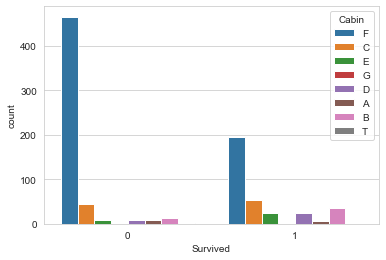

In [ ]:
sns.countplot(x = "Survived", hue = "Cabin", data= train)

<AxesSubplot:>

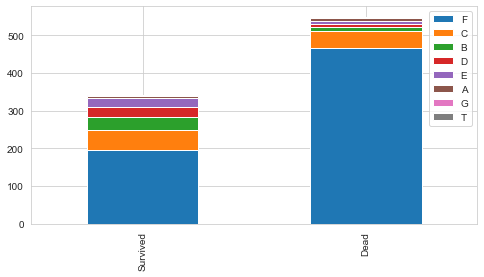

In [ ]:
survived = train[train["Survived"]==1]["Cabin"].value_counts()
dead = train[train["Survived"]==0]["Cabin"].value_counts()
df_cabin = pd.DataFrame([survived,dead])
df_cabin.index = ["Survived","Dead"]
df_cabin.plot(kind="bar",stacked = True, figsize = (8,4))


> **1.1.6. Cabin & Survived**

In [ ]:
# Cabin과 생존률survive의 관계
list_p = []
for n in range(0,8):
    # 사망자/ (사망자 + 생존자) * 100
    p = cabin_count.Prefix[n]/(cabin_count.Prefix[n]+cabin_count.Prefix[n+7])*100
    list_p.append( [cabin_count.Cabin[n] , p] )
list_deck_point = pd.DataFrame(list_p)

In [ ]:
list_deck_point['rate'] = list_deck_point[1]
list_deck_point = list_deck_point.drop(1,1)
list_deck_point.sort_values(by=['rate'], axis=0, ascending=False)

0       rate
5  F  95.092025
0  A  88.888889
1  B  63.157895
2  C  56.250000
7  T  33.333333
4  E  24.242424
3  D  12.903226
6  G   1.015228

In [ ]:
# 생존률에 따라 점수 부여

cabin_mapping = {"A": 89, "G": 63, "C": 40, "T":33, "F":24, "B":20,"E":19,"D":17} 
train['Cabin_score'] = train['Cabin'].map(cabin_mapping)
train.Cabin_score.head()

0    24
1    40
2    24
3    40
4    24
Name: Cabin_score, dtype: int64

- A, B, C, T, E, G, D, F 순서로 생존률이 높았다. 
- T는 데이터가 하나 밖에 없기 때문에 삭제하는 편이 성능을 높일 것으로 보인다.
- T값을 33 혹은 조정치를 적용했을 때 모두 cabin_score과 survived의 관계는 낮았다.(차후 히트맵으로 제공 예정)